# Libraries

## Hosted Machine Only

In [ ]:
!pip install keras==2.15.0
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Suc

In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow

In [2]:
drive.mount('drive')

Mounted at drive


In [ ]:
# from keras import ops

## All Machine

In [3]:
import os
import cv2
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from types import NoneType
from datetime import datetime
import statistics
from statistics import mean
import copy

try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle

In [ ]:
# DL
## tensorflow
import tensorflow as tf
from tensorflow import keras

import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, concatenate, Lambda
from keras.layers import GaussianNoise, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.metrics import BinaryAccuracy
###overfitting
from keras.regularizers import l2, l1_l2


##sklearn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

## GPU


tags:
GPU-1
GPU-2
GPU-3


In [ ]:
import gc

In [ ]:
!nvidia-smi

Sat Aug  3 20:22:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Setup GPU
devices = tf.config.experimental.list_physical_devices
gpus = devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [ ]:
devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

#Global variables

In [4]:
# Global variable used in functions !!

localmachine = True
localmachine = False

In [5]:
# if host:
root = "/content/drive/Othercomputers/My laptop"
#if local:root = "C:/Users/adam3/OneDrive/DocumentsMine/Principal/ArT/finalproject/MyProject/project"

# root_shared = f"{root}/shared/shared_1"
root_shared = f"{root}/shared_2"
# root_private = f"{root}/private/local"
root_private = f"{root}/michaelazriel340"


# 1- Shared Vars
all_img_folder_path = f"{root_shared}/images"
all_data_folder_path = f"{root_shared}/data"
all_models = f'{root_shared}/data/models'

##HHD
ds1 = "HHD"
ds_img_folder_path1 = f"{all_img_folder_path}/HHD/img"
ds_subimg_folder_path1 = f"{all_img_folder_path}/HHD/subimg"
data_path1 = f"{root_shared}/data/hhd"

##KHATT
ds2 = "KHATT"
ds_img_folder_path2 = f"{all_img_folder_path}/KHATT/img"
ds_subimg_folder_path2 = f"{all_img_folder_path}/KHATT/subimg"
data_path2 = f"{root_shared}/data/khatt"


# 2 - Private Vars
my_models = f'{root_private}/models'


In [6]:
# Patches parameters
patch_size = 150
resize = 600
input_shape = (patch_size, patch_size, 1)

In [7]:
# Variables for getting train/val/test ds


"""
# HHD
"""
vars = {
  # 'sub_df': sub_df1,
  'ds': ds1,
  'data_path': all_data_folder_path + '/hhd',
  'data_set_n': all_data_folder_path + '/hhd/hhd_1',
#   'data_set_n': all_data_folder_path + '/hhd/hhd_2',
}

"""
# KHATT
vars = {
  # 'sub_df': sub_df2,
  'ds': ds2,
  'data_path': all_data_folder_path + '/khatt',
  'data_set_n': all_data_folder_path + '/khatt/khatt_1',
}
"""

#dict
ds = vars['ds']
data_path = vars['data_path']
data_set_n = vars['data_set_n'] #data set  hhd_1 / khatt_1

# Functions

## Preprocessing Functions

### Create All images dataframe

In [ ]:
def makeDF(allimg_path, datasets ,csv_path):
  """
  allimg_path: string, path of dataset
  datasets: array of strings, names of datasets
  csv_path: string, path to store dataframe

  returns: dataframe
  """
  fnList, writerList, dsList, sizeList = list(), list(), list(), list()
  for ds in datasets:
    ds_path = allimg_path + '/' + ds + '/img'
    img_list = os.listdir(ds_path)
    print(len(img_list))

    for img in img_list:
      img_path = ds_path + '/' + img
      image = cv2.imread(img_path, cv2.IMREAD_COLOR)

      writer = getWriter(ds, img)

      dsList.append(ds)
      fnList.append(img)
      writerList.append(writer)
      sizeList.append(image.shape[:2])

  df_dict = {'filename': fnList, 'writer': writerList, 'dataset': dsList, 'size': sizeList}
  df = pd.DataFrame(df_dict)

  return df

In [ ]:
def getWriter(ds, img):
  """
  ds: string, name of dataset
  img: string, name of image

  returns: string, name of writer of this image
  """
  writer = 'unknown'
  if ds == 'HHD':
    writer = img.split('_')[0][1:]
  if ds == 'KHATT':
    writer = img.split('_')[1][2:]

  return writer

### Create Sub-Img

In [ ]:
def MakeSubimgDS(root, ds, subimg_numb=None, subimg_size=150, resize_max=600, all=True, limitblob=2):
  """
  this function create a folder with sub-img  and returns a dataframe describing this dataset

  root: string, path of the project file
  ds: string, name of the dataset
  subimg_numb: integer, number of sub-images per photo
  subimg_size: integer, size of sub-image
  resize_max: integer, length of the maximal side of the resized pic
  all: bool, true if works on all handwritten pics
  limitblob: integer, limit of blobs erased

  returns: dataframe
  """
  df = pd.DataFrame(columns=['filename_original', 'writer', 'dataset', 'number', 'filename_sub', 'size'])

  img_folder_path = f'{root}/images/{ds}/img'
  subimg_folder_path = f'{root}/images/{ds}/subimg'

  img_list = os.listdir(img_folder_path)

  counter = 0
  for img in img_list:
    #path + name
    filename = img.split('.')[0]
    filename_ext = '_' + filename + '_'
    writer = getWriter(ds, img)
    img_name = ds + '_' + writer + '_' + filename_ext
    img_path = img_folder_path + '/' + img

    subimgs = getSubImg(img_path, subimg_numb=subimg_numb, subimg_size=subimg_size, resize_max=resize_max, all=all, limitblob=limitblob)

    for i in range(subimgs.shape[0]):
      # print(i)
      subimg_name = img_name + '_' + str(i) + '.jpg'


      subimg_path = subimg_folder_path + '/' + subimg_name
      if type(subimgs[i]) == NoneType:
        print('NoneType')
      if subimgs[i].shape[:2] != (subimg_size, subimg_size):
        print('shape pb')

      if cv2.imwrite(subimg_path, subimgs[i]) != True:
        print('img not saved with success')

      row = pd.Series({'filename_original': filename, 'writer': writer, 'dataset': ds, 'number': i, 'filename_sub': subimg_name, 'size':subimgs[i].shape[:2]})
      df = pd.concat([df, row.to_frame().T], ignore_index=True)

    # counter+=1
    # if counter > 5:
    #   break

  df.to_pickle(f'{root}/data/subimg.pkl')
  return df

In [ ]:
def getSubImg(original_img_path, subimg_numb=None, subimg_size=150, resize_max=600, all=True, limitblob=2):
  """
  original_img_path: string, path of the image to divide
  subimg_numb: integer, number of sub-images per photo
  subimg_size: integer, size of sub-image
  resize_max: maximal size of one of the side of the picture resized (width or length)
  all: bool, true if works on all handwritten pics
  limitblob: integer, limit of blobs erased


  returns: an array of sub-images in format subimg_size*subimg_size  from an original image
  """
  """
  shortnames:
  r: row
  c: col
  """
  # Read the image
  img = cv2.imread(original_img_path)

  #crop
  croped_img = auto_crop_white_regions(img, all=all, limitblob=limitblob)

  #shrink
  shrinked_img = resizeAndPad(croped_img, subimg_size, resize_max)

  #divide
  subimgs = DivideImg(shrinked_img, subimg_size, subimg_numb)

  return subimgs

In [ ]:
def resizeAndPad(img, subimg_size=150, resize_max=600, colorpad=[255, 255, 255]):
  """
    img: np array of pixels
    subimg_size:
    resize_max: int, size of the image
    colorpad: array of bgr numbers

    returns: new image
  """

  height, width = img.shape[:2]
  h_size, w_size = resize_max, resize_max

  if height > h_size or width > w_size:  # shrink
      interp = cv2.INTER_AREA
  else:  # strech
      interp = cv2.INTER_CUBIC

  ratio = width / height

  # print(f'before resize: {img.shape}')
  if ratio > 1:
      new_width = w_size
      new_height = np.round(new_width/ratio).astype(int)

      #pad
      h_size =  np.ceil(new_height / subimg_size).astype(int) * subimg_size
      pad = abs(h_size - new_height) / 2
      pad_top, pad_bot = np.floor(pad).astype(int), np.ceil(pad).astype(int)
      pad_left, pad_right = 0, 0

  elif ratio < 1:
      new_height = h_size
      new_width = np.round(new_height * ratio).astype(int)

      #pad
      w_size =  np.ceil(new_width / subimg_size).astype(int) * subimg_size
      pad = abs(w_size - new_width) / 2
      pad_left, pad_right = np.floor(pad).astype(int), np.ceil(pad).astype(int)
      pad_top, pad_bot = 0, 0

  else:  # square
      new_height, new_width = h_size, w_size
      pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

  img_scaled = cv2.resize(img, (new_width, new_height), interpolation=interp)


  #padding or cropping
  if  new_height < subimg_size or new_width < subimg_size:
    img_scaled = cv2.copyMakeBorder(src=img_scaled, top=pad_top, bottom=pad_bot, left=pad_left, right=pad_right, borderType=cv2.BORDER_CONSTANT, value=colorpad)
  else:
    extra_h = new_height % subimg_size
    extra_w = new_width % subimg_size
    extra_h_pc = extra_h / new_height
    extra_w_pc = extra_w / new_width
    blank_h_pc = ((subimg_size - extra_h) / 2) / subimg_size if extra_h > 0 else 0
    blank_w_pc = ((subimg_size - extra_w) / 2) / subimg_size if extra_w > 0 else 0
    if  (extra_h_pc >= 0.20 and blank_h_pc <= 0.30) or (extra_w_pc >= 0.20 and blank_w_pc <= 0.25): # max 20% blank rows per patches
      img_scaled = cv2.copyMakeBorder(src=img_scaled, top=pad_top, bottom=pad_bot, left=pad_left, right=pad_right, borderType=cv2.BORDER_CONSTANT, value=colorpad)
    else: #throw 0-149 px
      img_scaled = img_scaled[:new_height-extra_h, :new_width-extra_w]

  # print(f'after resize: {img_scaled.shape}')
  return img_scaled


In [ ]:
def DivideImg(img, subimg_size=150):
  """
  img: np array in format (600, n*200) or inverse
  subimg_size: integer, size of sub-image

  returns: an array of sub-images in format sub_size*sub_size  from an original image
  """

  rows, cols = img.shape[:2]
  n_rows = int(rows / subimg_size)
  n_cols = int(cols / subimg_size)

  subimgs = list()

  for r in range(n_rows):
    for c in range(n_cols):
      subimgs.append(img[r*subimg_size: (r+1)*subimg_size, c*subimg_size: (c+1)*subimg_size])

  # print(f'{len(subimgs)}')
  return np.array(subimgs)

In [ ]:
def auto_crop_white_regions(img, all=True, limitblob=2):
  """
  crop only the bottom because other part are more meaningful

  img: gray cv2 np array
  all: bool, true if works on all handwritten pics
  limitblob: integer, limit of blobs erased

  returns: np array of cropped image
  """

  # Convert image to grayscale
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Crop rows
  img = Crop(img)

  # Crop cols
  img = np.transpose(img)
  img = Crop(img)
  img = np.transpose(img)

  return img



def Crop(img, all=True, limitblob=2):
  """
  img: np array
  all: bool, true if works on all handwritten pics
  limitblob: integer, limit of blobs erased
  """

  rows_nb = img.shape[0]
  mask = [True] * rows_nb

  if all:
    for i in reversed(range(rows_nb)):
      if False not in (img[i] == 255): # blank row
        mask[i] = False
  else:
    percent_erase = 0.05   #if 05% or more of the img is blank, crop it
    percent_ignore = 0.01  #if 01% or less of the img is not blank(into blank zone), crop it
    treshold_erase = round(percent_erase * rows_nb)
    treshold_ignore = round(percent_ignore * rows_nb)

    notblank_counter = 0
    blank_bot_counter = 0 # #(blank) under blom
    blank_top_counter = 0 # #(blank) upper blom
    blom_bot = False # bottom edge of the blom
    blom_top = False # top edge of the blom

    for i in reversed(range(rows_nb)):
      if False not in (img[i] == 255): # blank row
        if blom_top: # it is blank over the blom/line
          blank_top_counter += 1
        else:
          if blom_bot: # it is blank inside the blom/line
            blom_top = True
            blank_top_counter += 1
          else: # it is blank under the blom/line
            blank_bot_counter += 1
            mask[i] = False
      else: # not blank row: blom or line
        if blom_top: # we have passed the blom so we have encounter a new blom/line
          if ((blank_top_counter + blank_bot_counter) >= treshold_erase) and (notblank_counter <= treshold_ignore):
              for j in reversed(range(i, rows_nb)):
                mask[j] = False
          if limitblob <= 0:
            break
          else:
            limitblob -= 1
            blom_top = False
            blom_bot = True
            notblank_counter = 1
            blank_bot_counter = 0
            blank_top_counter = 0
        else:
          if blom_bot: # we are in the blom/line
            notblank_counter += 1
          else: # we were in blank zone and now we have meet a not blank zone
            blom_bot = True
            notblank_counter += 1

  return img[mask]

In [ ]:
def ShowImg(img):
  """
  img: image object
  """

  # Convert the image from BGR (OpenCV default) to RGB
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Get image dimensions
  height, width = img.shape[:2]

  # Calculate the DPI for the image to be displayed in its real size
  dpi = 100.0  # Adjust this value as needed for accurate sizing
  figsize = width / float(dpi), height / float(dpi)

  # Display the image using Matplotlib
  fig, ax = plt.subplots(figsize=figsize)
  ax.imshow(img_rgb)
  ax.axis('off')  # Hide axes

  plt.show()
  print()


### Create Train, Val, Test datasets

In [ ]:
def SplitData(df, train_test=False, percent=0.85):
  """
  df: dataframe of subimg
  train_test: boolean, true if it is for test dataset
  percent: float, in [0,1], percent of ds for training

  returns: 2 dataframes train_df, test_df with no writers in common
  """

  writers_bydocnb = df['writer'].value_counts()

  if train_test:
    writers_2docs = writers_bydocnb[writers_bydocnb > 1]
    writers_4_test = writers_2docs

  else:
    percent = 0.9
    writers_4_test = writers_bydocnb


  writers_4_test = writers_4_test.index.values

  random.shuffle(writers_4_test)
  writers_len = len(writers_bydocnb)
  test_writers_len = round(writers_len * (1 - percent))
  test_writers = writers_4_test[:test_writers_len]

  train_writers = [w for w in writers_bydocnb.index.values if w not in test_writers]

  #-?-secu
  if len(np.intersect1d(test_writers, train_writers)) != 0: #check if no intersection
    print(f'error: common authors')

  train_df = df.loc[df['writer'].isin(train_writers)]
  test_df = df.loc[df['writer'].isin(test_writers)]

  #?-2-shuffle df
  train_df = train_df.sample(frac=1)
  test_df = test_df.sample(frac=1)

  return train_df, test_df

In [ ]:
def PerfectShuffling(listing):
	"""
	listing: list of integers
	"""
	if len(listing) < 2:
		return listing
	new_listing = listing[:]
	indexes = list(range(len(listing)))
	for i in range(len(listing)):
		temp_indexes = indexes[:]
		if i in temp_indexes:
			temp_indexes.remove(i)
		if len(temp_indexes) != 0:
			not_i = random.choice(temp_indexes)
		else: #the last index available was equal to i
			not_i =  new_listing.index(listing[i-1])
			indexes.append(not_i)
			new_listing[i] = listing[i-1]
		new_listing[not_i] = listing[i]
		indexes.remove(not_i)

	return new_listing


def GeneratePairs(df, patch_path):
	"""
	df: dataframe, train/val/test dataframe of subimgs
	patch_path: string, path of patches file

	returns:
		- dataframe
		- dictionary, containing left and right images and labels

	do: generate pairs of sub-img or from the same author(label 1) or from
		differents author(label 0)
	"""
	#settings
	max_docs = 50
	minimal_patches = df['filename_original'].value_counts().min()

	#shuffling patches
	df = df.sample(frac=1, replace=False, axis=0, ignore_index=True)

	writers = list(set(df['writer'].values))

	pair_df = pd.DataFrame(columns=[
		'labels',
		'left_writer',
		'right_writer',
		'left_doc',
		'right_doc',
		'left_fn',
		'right_fn'
	])
	left_writers = writers
	right_writers_other = PerfectShuffling(left_writers)
	for i in range(len(left_writers)):
		left_writer = left_writers[i]
		right_writer_same = left_writer
		right_writer_other = right_writers_other[i]

		left_docs = list(set(df[df['writer']==left_writer]['filename_original'].values))
		right_docs_same = PerfectShuffling(left_docs)
		right_docs_other = list(set(df.loc[df['writer']==right_writer_other]['filename_original'].values))
		right_docs_other_plus = list(set(df.loc[(df['writer']!=left_writer) & (df['writer']!=right_writer_other)]['filename_original'].values))
		random.shuffle(right_docs_other_plus)
		right_docs_other += right_docs_other_plus

		same_pair_docs = list(zip(left_docs, right_docs_same))
		diff_pair_docs = list(zip(left_docs, right_docs_other))
		for label, pair in [(0, diff_pair_docs), (1, same_pair_docs)]:
			for left_doc, right_doc in pair[:max_docs]:
				left_patches = df[df['filename_original'] == left_doc]
				right_patches = df[df['filename_original'] == right_doc]
				min_patches = min([len(left_patches), len(right_patches)])
				left_patches = left_patches[:minimal_patches]
				right_patches = right_patches[:minimal_patches]

				right_patches_indexes = list(right_patches.index)
				if random.randint(1, 100) < 65:
					right_patches_indexes = PerfectShuffling(right_patches_indexes)
				else:
					random.shuffle(right_patches_indexes)

				right_patches = right_patches.loc[right_patches_indexes]

				rows_dict = {
					'labels': [label] * minimal_patches,
					'left_writer': left_patches['writer'].values,
					'right_writer': right_patches['writer'].values,
					'left_doc': left_patches['filename_original'].values,
					'right_doc': right_patches['filename_original'].values,
					'left_fn': left_patches['filename_sub'].values,
					'right_fn': right_patches['filename_sub'].values
				}

				rows_df = pd.DataFrame(data=rows_dict)
				pair_df = pd.concat([pair_df, rows_df], ignore_index=True)

	lefts, rights = LoadData(pair_df['left_fn'].values, patch_path), LoadData(pair_df['right_fn'].values, patch_path)
	pair_data = {'lefts': lefts, 'rights': rights, 'labels': pair_df['labels'].values}

	return pair_df, pair_data

In [ ]:
def ExGeneratePairs(df, patch_path, test=False, minimal=4):
  """

    df: dataframe, train/val/test dataframe of subimgs
    ds: string, dataset name
    all_img_folder_path:
    test: bool, true if it is for test set purpose
    minimal: int, minimal number of patch per writer

    returns:
      - dataframe
      - dictionary, containing left and right images and labels

    do: generate pairs of sub-img or from the same author(label 1) or from
        differents author(label 0)
  """
  def Append(pair_type):
    """
    do:
    pair_type: string, same or diff
    """
    label = 1 if pair_type == 'same' else 0
    labels.append(label)

    ln.append(lp['filename_sub'])
    la.append(lp['writer'])
    ld.append(lp['filename_original'])

    rn.append(rp['filename_sub'])
    ra.append(rp['writer'])
    rd.append(rp['filename_original'])

  writer_counts = df['writer'].value_counts()

  #-*-secu
  if len(writer_counts[writer_counts < minimal]) > 0:
    print('error: minimal')

  writers = list(writer_counts.index.values)

  #shuffle patches
  df= df.sample(frac=1, replace=False, axis=0, ignore_index=True)# df

  # shuffle writers
  random.shuffle(writers)

  labels = list()
  ln, rn = list(), list() # left name(file), right name
  la, ra = list(), list() # left author, right author
  ld, rd = list(), list() # left doc (original), right doc (original)

  if test:
    docs = list()
    for j in range(len(writers)):
      dfW = df[df['writer'] == writers[j]]
      doc_set = list(set(dfW['filename_original']))
      doc = random.choice(doc_set)
      docs.append(doc)

  for i in range(minimal):
    for j in range(len(writers)):
      lw = df[df['writer'] == writers[j]] #left writer

      if(test):
        lw = lw[lw['filename_original'] == docs[j]]

      lp = lw.iloc[i] #left patch

      # Same Authors
      choices = list(range(len(lw)))

      if random.randint(1, 100) < 55: #-1
         choices.remove(i)
      rand = random.choice(choices)
      rp = lw.iloc[rand]

      Append('same')

      # Different Authors
      if j == (len(writers) - 1):
        rw = df[df['writer']==writers[0]]
      else:
        rw = df[df['writer']==writers[j+1]]

      if(test):
        w = rw['writer'].iloc[0]
        i_w = writers.index(w)
        rw = rw[rw['filename_original'] == docs[i_w]]
      rp = rw.iloc[i]

      Append('diff')

  pair_df = pd.DataFrame({'labels': np.array(labels),
                          'left_writer': la,
                          'right_writer': ra,
                          'left_doc': ld,
                          'right_doc': rd,
                          'left_fn': ln,
                          'right_fn': rn})

  lefts, rights = LoadData(pair_df['left_fn'], patch_path), LoadData(pair_df['right_fn'], patch_path)
  pair_data = {'lefts': lefts, 'rights': rights, 'labels': np.array(labels)}

  return pair_df, pair_data

In [ ]:
def LoadData(filenames, patch_path):
  """
  filenames: array of filenames patches
  patch_path: string, path of folder of patch file

  returns: np array of patches

  do:
      - preprocessing:
        * normalize imgs
        * reshape from (200, 200) to (200, 200, 1)
  """

  images = list()
  for i in range(len(filenames)):
    fn = filenames[i]
    img_path = patch_path + '/' + fn
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    if type(img) == NoneType:
        print(f'type pb with {fn}')

    # prepro
    ## normalize
    img = img / 255

    ## reshape
    img = img.reshape(img.shape[0], img.shape[1], 1)

    ## tresholding
    # thresh, img = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    images.append(img)

  return np.array(images)

## Saving & Loading Data Functions

In [ ]:
def SaveNumpy(np_dict, phase, datapath):
    """
    nps: dictionary of np arrays, ['lefts', 'rights', 'labels']
    phase: string ('train' / 'val' / 'test')
    datapath: string, path of the file to save the nps
    """
    types = ['lefts', 'rights', 'labels']
    for i in range(len(types)):
        filename = phase + '_' + types[i] + '.npy'
        np.save(f'{datapath}/{filename}' , np_dict[types[i]])


def LoadNumpy(phase, datapath):
    """
    phase: string ('train' / 'val' / 'test')
    datapath: string, path of the file to load the nps

    return array of left and right images and labels
    """
    np_dict = dict()
    types = ['lefts', 'rights', 'labels']
    for t in types:
        filename = phase + '_' + t + '.npy'
        data = np.load(f'{datapath}/{filename}', allow_pickle= True)
        np_dict[t] = data

    return np_dict

## Building Model Functions

In [ ]:
def BuildSiameseBrother(params):
    """
    params: BuildParams instance

    returns keras model
    """
    input_shape = params.input_shape
    alpha1 = params.alpha1
    alpha2 = params.alpha2
    std_dev = 0
    batch_normal = params.batch_normal

    input = Input(shape=input_shape)

    #cnn part: feature extraction layers
    x = Conv2D(32, (10, 10), activation='relu', padding='same', kernel_regularizer=l1_l2(l1=alpha1, l2=alpha2))(input)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (8, 8), activation='relu', padding='same', kernel_regularizer=l1_l2(l1=alpha1, l2=alpha2))(x)
    x = MaxPooling2D((2, 2))(x)

    x = Conv2D(64, (4, 4), padding='same', kernel_regularizer=l1_l2(l1=alpha1, l2=alpha2))(x)
    # if batch_normal:
    #     x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2))(x)

    #fcnn part: classification layers
    x = Flatten()(x)
    x = Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=alpha1, l2=alpha2))(x)
    x = Dropout(0.5)(x)

    #avec ou sans l2 ?
    x = Dense(256, kernel_regularizer=l1_l2(l1=alpha1, l2=alpha2))(x)
    # if batch_normal:
    #     x = BatchNormalization()(x)
    x = Activation('relu')(x)

    return Model(input, x)

In [ ]:
def GetShape(shapes):
  return shapes[0]

In [ ]:
def BuildSiameseNN(params, localmachine=localmachine):
    """
    params: BuildParams instance
    localmachine: boolean, true if the notebook run on a local machine
    """

    input_shape = params.input_shape
    alpha1 = params.alpha1
    alpha2 = params.alpha2
    std_dev = params.std_dev
    batch_normal = False #params.batch_normal


    # Define the tensors for the two input images
    inputL = Input(shape=input_shape)
    inputR = Input(shape=input_shape)

    # Build the base network to use in each siamese 'leg'
    base_cnn = BuildSiameseBrother(params)

    # Generate the feature vectors for the two images
    featsL = base_cnn(inputL)
    featsR = base_cnn(inputR)

    # Compute the element-wise absolute difference, square difference, and Hadamard product
    concat_features = concatenate([featsL, featsR])
    # sq_diff = Lambda(lambda tensors: K.square(tensors[0] - tensors[1]), output_shape=GetShape)([featsL, featsR]) if localmachine else Lambda(lambda tensors: ops.square(tensors[0] - tensors[1]), output_shape=GetShape)([featsL, featsR])
    sq_diff = Lambda(lambda tensors: K.square(tensors[0] - tensors[1]), output_shape=GetShape)([featsL, featsR])
    hadamard_product = Lambda(lambda tensors: tensors[0] * tensors[1], output_shape=GetShape)([featsL, featsR])

    # Concatenate all computed differences
    concatenated = concatenate([concat_features, sq_diff, hadamard_product])

    # output = Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=alpha1, l2=alpha2))(concatenated)
    output = Dense(256, kernel_regularizer=l1_l2(l1=alpha1, l2=alpha2))(concatenated)
    output = GaussianNoise(std_dev)(output)
    output = Activation('relu')(output)

    output = Dense(512, kernel_regularizer=l1_l2(l1=alpha1, l2=alpha2))(output)
    # if batch_normal:
    #     output = BatchNormalization()(output)
    output = Activation('relu')(output)

    output = Dense(2, activation='softmax')(output)

    # Define the model
    model = Model(inputs=[inputL, inputR], outputs=output)

    return model


## Saving Model

In [ ]:
def SaveModel(model, test_acc, path='content', model_name=None):
    """
    model: keras model
    test_acc: float, test accuracy
    path: string, path where to save the model
    model_name: string, model name
    """

    name = 'model' if model_name == None else model_name

    now = datetime.now()
    dt_serie = now.strftime("%Y%m%d_%H%M%S") #to avoid overide
    acc = int(test_acc * 100)
    name = f'{name}_{acc}_{dt_serie}'

    model.save(f'{path}/{name}.h5')


## Evaluate Functions

In [ ]:
def TranslatePredict(preds):
    """
    preds: float list, model predictions
    returns: 2 list of translated predictions
    """
    pred_2bit = list()
    pred_1bit = list()
    for p in preds:
        if p[0] > p[1]:
            p_2 = [1.0, 0.0]
            p_1 = 0
        else:
            p_2 = [0.0, 1.0]
            p_1 = 1
        pred_2bit.append(p_2)
        pred_1bit.append(p_1)

    return pred_2bit, pred_1bit

In [ ]:
def EvaluatePredict(preds, labels, bits, toprint=False):
    """
    preds: predicted labels
    labels: true labels
    bits: integer, number of bits used for label representation (1 or 2)
    toprint: boolean, true in order to print details

    return accuracy, precision, recall, f1 score
    """
    total = len(labels)
    tp, fp, tn, fn = 0, 0, 0, 0
    for i in range(total):
        if bits == 2:
            if (preds[i][0] == 1 and preds[i][1] == 0) and (labels[i][0] == 1 and labels[i][1] == 0):
                tn += 1
            elif (preds[i][0] == 1 and preds[i][1] == 0) and (labels[i][0] == 0 and labels[i][1] == 1):
                fn += 1
            elif (preds[i][0] == 0 and preds[i][1] == 1) and (labels[i][0] == 0 and labels[i][1] == 1):
                tp += 1
            elif (preds[i][0] == 0 and preds[i][1] == 1) and (labels[i][0] == 1 and labels[i][1] == 0):
                fp += 1

        elif bits == 1:
            if preds[i] == 0 and labels[i] == 0:
                tn += 1
            elif preds[i] == 0 and labels[i] == 1:
                fn += 1
            elif preds[i] == 1 and labels[i] == 1:
                tp += 1
            elif preds[i] == 1 and labels[i] == 0:
                fp += 1

    if total != (tp + fp + tn + fn):
        print("PB")

    precision = (tp / (tp + fp)) if (tp + fp) != 0 else 0
    recall = (tp / (tp + fn)) if (tp + fn) != 0 else 0
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    cm = {'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn}

    if toprint:
        print(f"true positives: {tp}, false positives: {fp}")
        print(f"true negatives: {tn}, false positives: {fn}")
        print(f"\n- accuracy: {accuracy}, \n- precision: {precision}, \n- recall: {recall}, \n- f1 score: {f1}")


    return {'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1': f1, 'cm': cm}

In [ ]:
def MakeDocDF(test_df, pred):
    """
    test_df: test dataframe
    pred: predicted labels

    returns: dataframe
    """
    test_df['pred'] = pred
    majority_df = pd.DataFrame(columns=['left_doc', 'right_doc', 'label', 'pred'])
    for l, r in test_df[['left_doc', 'right_doc']].value_counts().index:
        pair_df = test_df.loc[(test_df['left_doc'] == l) & (test_df['right_doc'] == r)]
        count_1 = len(pair_df.loc[pair_df['pred'] == 1])
        count_0 = len(pair_df.loc[pair_df['pred'] == 0])
        label = pair_df.iloc[0]['labels']
        pred = 0 if count_0 >= count_1 else 1
        row = pd.Series({ 'left_doc': l, 'right_doc': r, 'label': label, 'pred': pred })
        majority_df = pd.concat([majority_df, row.to_frame().T], ignore_index=True)

    return majority_df

In [ ]:

def Evaluate(model, test_x, test_y, test_df, toprint=False):
    """
    model: keras model
    test_x: test samples
    test_y: test labels
    test_df: test data frame
    toprint: boolean, true to print details
    """
    # Patch Level
    pred = model.predict(test_x)
    pred_2bit, pred_1bit = TranslatePredict(pred)
    patch_dict = EvaluatePredict(pred_2bit, test_y, 2, toprint)

    # Doc Level
    doc_df = MakeDocDF(test_df, pred_1bit)
    all = doc_df.loc[(doc_df['label']==1) & (doc_df['left_doc']!=doc_df['right_doc'])]
    doc_dict = EvaluatePredict(doc_df['pred'], doc_df['label'], 1)

    return patch_dict, doc_dict

In [ ]:
# roc curve and auc

def EvalROC(pred, true_pred, twoD=True):
    """
    pred: predicted labels
    true_pred: true labels
    twoD: boolean
    """
    ns_probs = [0 for _ in range(len(true_pred))]
    lr_probs = pred
    if twoD:
        # keep probabilities for the positive outcome only
        lr_probs = lr_probs[:, 1]
        true_pred = true_pred[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(true_pred, ns_probs)
    lr_auc = roc_auc_score(true_pred, lr_probs)
    # summarize scores
    print('ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(true_pred, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(true_pred, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

## Experiment Functions

In [ ]:
# Train Test
def MakeExperiment(model_obj, data_obj, df, back_path=root_private, newmodel_name=None, localmachine=localmachine):
    """
    model_obj: instance of class ModelClass
    data_obj: instance of DataClass
    df: experiments dataframe
    back_path: string, path to save the model
    newmodel_name: string, new model name
    localmachine: boolean, true if runs in local machine

    returns: new experiements dataframe
    """
    my_models = back_path + '/models'

    train_acc, val_acc = TrainModel(model_obj, data_obj, model_obj.trainings[-1], localmachine)
    patch_dict, _ = Evaluate(model_obj.model, data_obj.test_x, data_obj.test_y, data_obj.test_df)

    model_obj.SaveModel(patch_dict['accuracy'], my_models, newmodel_name)

    dictio = {
        'model after training': model_obj.name,
        'model before training': model_obj.exname,
        'dataset': data_obj.name,
        # 'model parameters': model_params,
        'train parameters': model_obj.trainings[-1].GetDict(),
        'train accuracy': train_acc,
        'val accuracy': val_acc,
        'test accuracy': patch_dict['accuracy'],
        'test precision': patch_dict['precision'],
        'test recall': patch_dict['recall'],
        'test f1-score': patch_dict['f1']
    }

    df = RecordTest(df, dictio)
    df.to_pickle(f'{back_path}/experiments.pkl')
    return df

In [ ]:
def EvalExperiment(model, model_name, datasets, df, localmachine=localmachine):
    """
    model: keras model
    model_name: string, name of the model on which we experiement
    datasets: string list , path of the dataset used for train, val et test steps (ex: hhd_1, hhd_2, khatt_1 etc...)
    df: evaluation dataframe
    localmachine: boolean, true if runs in local machine

    returns eval dataframe
    """

    for ds in datasets:
        if localmachine:
            gc.collect() #GPU-2

        test_df = pd.read_pickle(f'{ds}/test.pkl')
        test = LoadNumpy('test', ds)
        test_x =  [test['lefts'], test['rights']]
        test_y = to_categorical(test['labels'], num_classes=2)

        # test_acc, test_prec, test_rec, test_f1, cm = Evaluate(model, test_x, test_y)
        patch_dict, doc_dict = Evaluate(model, test_x, test_y, test_df)

        ds_name = ds.split('/')[-1]

        eval_dict = {
            'model': model_name,
            'dataset': ds_name,
            'confusion matrix': patch_dict['cm'],
            'test accuracy': patch_dict['accuracy'],
            'test precision': patch_dict['precision'],
            'test recall': patch_dict['recall'],
            'test f1-score': patch_dict['f1']
        }

        df = RecordTest(df, eval_dict)

        eval_dict = {
            'model': model_name,
            'dataset': f'{ds_name}_doc',
            'confusion matrix': doc_dict['cm'],
            'test accuracy': doc_dict['accuracy'],
            'test precision': doc_dict['precision'],
            'test recall': doc_dict['recall'],
            'test f1-score': doc_dict['f1']
        }

        df = RecordTest(df, eval_dict)

    return df

In [ ]:
def RecordTest(df, test_dict):
    """
    df: dataframe
    test_dict: dictionnary, new row to add to the dataframe

    returns: dataframe
    """
    row = pd.Series(test_dict)
    row_df = row.to_frame().T

    df = pd.concat([df, row_df], ignore_index=True)

    return df

In [ ]:
def TrainModel(model_obj, data_obj, train_params, localmachine=localmachine):
    """
    model_obj: instance of ModelClass
    train_params: instance of class TParams
    data_obj: instance of class DataClass
    localmachine: boolean, true if runs in local machine

    returns: two floats, train and val accuracies
    """

    model = model_obj.model
    # Fit model
    if localmachine:
        gc.collect()

    history = model.fit(
        data_obj.train_x, data_obj.train_y,
        validation_data=(data_obj.val_x, data_obj.val_y),
        epochs=train_params.epochs,
        verbose=train_params.verbose,
        batch_size=train_params.batch_size
    )

    model_obj.AddHistory(history)
    model_obj.PlotLearningCurve()

    # Compute & Return train and val accuracy
    train_acc = statistics.mean(history.history['accuracy'][-3:])
    val_acc = statistics.mean(history.history['val_accuracy'][-3:])

    return train_acc, val_acc

## Classes

Updates

Functions & Classes

In [ ]:
def SaveModelObject(model_obj, path='content', savemodel=False):
    if savemodel:
        model_obj.model.save(f'{path}/{model_obj.name}.h5')

    x_obj = ModelClass()
    x_obj.AlmostShadowCopy(model_obj, saveobject=True)

    with open(f'{path}/{x_obj.name}_modelobj.pkl', 'wb') as outp:
        # pickle.dump(model_obj, outp, pickle.HIGHEST_PROTOCOL)
        pickle.dump(x_obj, outp)


def LoadModelObject(model_name, path='content'):
    with open(f'{path}/{model_name}_modelobj.pkl', 'rb') as inp:
        model_obj = pickle.load(inp)

    model_obj.LoadModel(path, f'{model_name}')
    return model_obj

In [ ]:
class ModelClass(object): #model parmeters
    def __init__(self):
        """
        builder: function to build NN
        """
        self.trainings = list()
        self.history = {
            'accuracy': list(),
            'loss': list(),
            'val_accuracy': list(),
            'val_loss': list()
        }

    def CreateModel(self, build_params, compil_params):
        # input_shape = build_params.input_shape
        # alpha1 = build_params.alpha1
        # alpha2 = build_params.alpha2
        builder = build_params.builder
        self.build_params = build_params

        optimizer = compil_params.optimizer
        lrate = compil_params.lrate
        loss = compil_params.loss
        self.compil_params = compil_params

        self.name = None
        self.model = builder(self.build_params)
        opt = optimizer(learning_rate=lrate)
        self.model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

    def LoadModel(self, allmodels_path, model_name):
        self.name = model_name
        self.model = keras.models.load_model(
            f'{allmodels_path}/{model_name}.h5',
        )
        # self.model = keras.models.load_model(
        #     f'{allmodels_path}/{model_name}.keras',
        #     safe_mode=False,
        #     custom_objects={"GetShape": GetShape}
        # )


    def SaveModel(self, test_acc=None, path='content', model_name=None):
        newname = 'model' if model_name == None else model_name

        now = datetime.now()
        dt_serie = now.strftime("%Y%m%d_%H%M%S") #to avoid overide
        acc = f'_{int(test_acc * 100)}' if test_acc != None else ''
        newname = f'{newname}{acc}_{dt_serie}'

        self.exname = self.name
        self.name = newname

        self.model.save(f'{path}/{self.name}.h5')
        # self.model.save(f'{path}/{self.name}.keras')


    def AddTraining(self, train_params):
        self.trainings.append(train_params)
        self.last_epochs = train_params.epochs


    def AddHistory(self, history):
        for k in ['accuracy', 'loss', 'val_accuracy', 'val_loss']:
            self.history[k] += history.history[k]


    def PlotLearningCurve(self, begin1=0, epochs=None):

        x = np.arange(len(self.history['accuracy']))
        end1 = - self.last_epochs if epochs == None else  - epochs
        begin2 = - (self.last_epochs + 1) if epochs == None else  - (epochs + 1)
        # Plot accuracy and loss curves
        plt.plot(x[begin1:end1], self.history['accuracy'][begin1:end1], label='train')
        plt.plot(x[begin2:], self.history['accuracy'][begin2:], color='darkblue')#, linestyle='dashed')
        plt.plot(x[begin1:end1], self.history['val_accuracy'][begin1:end1], label='val')
        plt.plot(x[begin2:], self.history['val_accuracy'][begin2:], color='red')#, linestyle='dashed')
        plt.title('Accuracy', pad=-50)
        plt.legend()
        plt.show()

        plt.plot(x[begin1:end1], self.history['loss'][begin1:end1], label='train')
        plt.plot(x[begin2:], self.history['loss'][begin2:], color='darkblue')#, linestyle='dashed')
        plt.plot(x[begin1:end1], self.history['val_loss'][begin1:end1], label='val')
        plt.plot(x[begin2:], self.history['val_loss'][begin2:], color='red')#, linestyle='dashed')
        plt.title('Loss', pad=-50)
        plt.legend()
        plt.show()

    def AlmostShadowCopy(self, other, saveobject=False):
        self.model = other.model
        self.name = other.name
        self.exname = other.exname
        self.history = other.history
        self.last_epochs = other.last_epochs

        if not saveobject:
            #objects
            if hasattr(other,'build_params'):
                self.build_params = copy.deepcopy(other.build_params)
            if hasattr(other,'compil_params'):
                self.compil_params = copy.deepcopy(other.compil_params)
            if hasattr(other,'trainings'):
                self.trainings = copy.deepcopy(other.trainings)


class BuildParams(object):
    def __init__(self, builder, input_shape, alpha1=0, alpha2=0, std_dev=0, batch_normal=False):
        self.builder = builder
        self.input_shape = input_shape
        self.alpha1 = alpha1
        self.alpha2 = alpha2
        self.std_dev = std_dev
        self.batch_normal = batch_normal


class CompilParams(object):
    def __init__(self, optimizer, lrate, loss):
        self.optimizer = optimizer
        self.lrate = lrate
        self.loss = loss


class TrainParams(object): #training parameters
    def __init__(self, dataset, epochs, batch_size, verbose=0, shuffle=True):
        self.dataset = dataset
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.shuffle = shuffle

    def GetDict(self):
        return {
            'epochs':self.epochs,
            'batch_size':self.batch_size,
            'verbose':self.verbose,
            'shuffle':self.shuffle
        }


In [ ]:
class DataClass(object):
    def __init__(self, alldata_path):
        self.paths = {
            'hhd_1':  alldata_path + '/hhd/hhd_1',
            'hhd_2': alldata_path + '/hhd/hhd_2',
            'hhd_oneplus': alldata_path + '/hhd/hhd_oneplus',
            'khatt_1': alldata_path + '/khatt/khatt_1'
        }

    def LoadData(self, dataset, end_train=None):
        self.name = dataset

        if dataset in self.paths:
            path = self.paths[dataset]
        else:
            sys.exit(f'dataset {dataset} does not exist.')

        self.train_df = pd.read_pickle(f'{path}/train.pkl')
        self.val_df = pd.read_pickle(f'{path}/val.pkl')
        self.test_df = pd.read_pickle(f'{path}/test.pkl')

        train = LoadNumpy('train', path)
        val = LoadNumpy('val', path)
        test = LoadNumpy('test', path)

        self.GetData(train, val, test, end_train)

    def GetData(self, train, val, test, dfs=None, end_train=None):
        self.train_x = [train['lefts'][:end_train], train['rights'][:end_train]]
        self.train_y = to_categorical(train['labels'][:end_train], num_classes=2)
        self.val_x =  [val['lefts'][:end_train], val['rights'][:end_train]]
        self.val_y = to_categorical(val['labels'][:end_train], num_classes=2)
        self.test_x =  [test['lefts'][:end_train], test['rights'][:end_train]]
        self.test_y = to_categorical(test['labels'][:end_train], num_classes=2)

        if dfs != None:
            self.train_df = dfs[0]
            self.val_df = dfs[1]
            self.test_df = dfs[2]


# Main

## Get All Images

### Get Dataframe of all images: HHD and KHATT datasets

Create Data

In [ ]:
# df = makeDF(all_img_folder_path, datasets, all_data_folder_path)

Save Data

In [ ]:
# df.to_pickle(all_data_folder_path + '/' + 'allimgs.pkl')

Load Data

In [9]:
df = pd.read_pickle(all_data_folder_path + '/' + 'allimgs.pkl')

In [ ]:
df

,filename,writer,dataset,size
0,w575_M_3_form2.tif,575,HHD,"(1163, 3932)"
1,w574_M_3_form33.tif,574,HHD,"(1375, 3918)"
2,w574_M_3_form34.tif,574,HHD,"(1147, 3909)"
3,w573_F_3_form8.tif,573,HHD,"(1329, 3930)"
4,w573_F_3_form3.tif,573,HHD,"(1224, 3974)"
...,...,...,...,...
4889,KHATT_Wr0265_Para2.tif,0265,KHATT,"(1593, 2219)"
4890,KHATT_Wr0266_Para4.tif,0266,KHATT,"(690, 2256)"
4891,KHATT_Wr0267_Para2.tif,0267,KHATT,"(1337, 2298)"
4892,KHATT_Wr0266_Para2.tif,0266,KHATT,"(1259, 2309)"


### Analyzing Data

In [10]:
"""
4894 rows × 4 columns
"""
df

,filename,writer,dataset,size
0,w575_M_3_form2.tif,575,HHD,"(1163, 3932)"
1,w574_M_3_form33.tif,574,HHD,"(1375, 3918)"
2,w574_M_3_form34.tif,574,HHD,"(1147, 3909)"
3,w573_F_3_form8.tif,573,HHD,"(1329, 3930)"
4,w573_F_3_form3.tif,573,HHD,"(1224, 3974)"
...,...,...,...,...
4889,KHATT_Wr0265_Para2.tif,0265,KHATT,"(1593, 2219)"
4890,KHATT_Wr0266_Para4.tif,0266,KHATT,"(690, 2256)"
4891,KHATT_Wr0267_Para2.tif,0267,KHATT,"(1337, 2298)"
4892,KHATT_Wr0266_Para2.tif,0266,KHATT,"(1259, 2309)"


**1. HHD**

In [11]:
df_hhd = df[df['dataset'] =='HHD']
df_hhd

,filename,writer,dataset,size
0,w575_M_3_form2.tif,575,HHD,"(1163, 3932)"
1,w574_M_3_form33.tif,574,HHD,"(1375, 3918)"
2,w574_M_3_form34.tif,574,HHD,"(1147, 3909)"
3,w573_F_3_form8.tif,573,HHD,"(1329, 3930)"
4,w573_F_3_form3.tif,573,HHD,"(1224, 3974)"
...,...,...,...,...
889,w2_M_3_form40.tif,2,HHD,"(1862, 3936)"
890,w2_M_3_form33.tif,2,HHD,"(1813, 3894)"
891,w1_F_4_form1.tif,1,HHD,"(2306, 3960)"
892,w2_M_3_form31.tif,2,HHD,"(2568, 3861)"


a. Size of images


smallest dimensions

In [ ]:
row_min = min([e[0] for e in df_hhd['size']])
col_min = min([e[1] for e in df_hhd['size']])
print(row_min)
print(col_min)
"""
output:
860
3498
"""

In [ ]:
#smallest pic
df_hhd[df_hhd['size']==min(df_hhd['size'])]

biggest dimensions

In [ ]:
row_max = max([e[0] for e in df_hhd['size']])
col_max = max([e[1] for e in df_hhd['size']])
print(row_max)
print(col_max)
"""
output:
3920
4756
"""

In [ ]:
#biggest pic
df_hhd[df_hhd['size']==max(df_hhd['size'])]

b. We check the number of doc per writer

In [12]:
a = df_hhd['writer'].value_counts()
a

,count
writer,
3,40
4,18
2,12
524,12
573,10
...,...
331,1
335,1
486,1


In [ ]:
b = a[a > 1]
b

writer
3      40
4      18
524    12
2      12
23     10
       ..
25      2
46      2
5       2
42      2
9       2
Name: count, Length: 68, dtype: int64

In [ ]:
len(b)/len(a)

0.11846689895470383

In [ ]:
b.sum()

donc pour le test set on a de la data (majority vote)
- il faut que la fonction split choisisse les auteurs du test set parmi ceux la
- la fonction "pair" doit prendre ses patches par pair de docs, tout en preservant les 3 equilibres
 (0/1, auteurs, pair auteurs)

In [13]:
ab = a.value_counts()
ab

,count
count,
1,506
4,18
3,14
2,9
10,8
6,8
5,3
12,2
7,2


In [16]:
ab['count'].sort_values()

KeyError: 'count'

**2. KHATT**

a. Size of images


smallest dimensions

In [ ]:
df_khatt = df[df['dataset'] =='KHATT']

In [ ]:
df_khatt

In [ ]:
row_min = min([e[0] for e in df_khatt['size']])
col_min = min([e[1] for e in df_khatt['size']])
print(row_min)
print(col_min)
"""
output:
207
1746
"""

In [ ]:
#smallest pic
df_khatt[df_khatt['size']==min(df_khatt['size'])]

biggest dimensions

In [ ]:
#biggest pic
df_khatt[df_khatt['size']==max(df_khatt['size'])]

## Get Sub-Img

### Get Data

Create & Save Data

In [ ]:
# sub_df1 = MakeSubimgDS(root, ds1, subimg_size=patch_size, resize_max=resize)

In [ ]:
# sub_df2 = MakeSubimgDS(root, ds2)

Load Data

In [ ]:
sub_df1 = pd.read_pickle(f'{root_shared}/data/hhd/subimg.pkl')

In [ ]:
sub_df2 = pd.read_pickle(f'{root_shared}/data/khatt/subimg.pkl')

#### Cleaning khatt patch dataset from insufficient patches

In [ ]:
sub_df2

In [ ]:
excluded_150 = list()
for file in os.listdir(ds_subimg_folder_path2):
    split = file.split('.')
    if len(split) > 1:
        path_img = f'{ds_subimg_folder_path2}/{file}'
        img = cv2.imread(path_img)
        img_neg = 255 - img
        sum_img = np.sum(img_neg)
        if  sum_img < 150000:
            excluded_150.append(file)

In [ ]:
len(excluded_150)

In [ ]:
excluded_150[0]

In [ ]:
sub_df2 = sub_df2.loc[~sub_df2['filename_sub'].isin(excluded_150)]

In [ ]:
sub_df2

In [ ]:
sub_df2.to_pickle(f'{ds_subimg_folder_path2}/data/subimg.pkl')

### Analyzing Data

**1. HHD**

In [ ]:
"""
5680 rows
"""
sub_df1

,filename_original,writer,dataset,number,filename_sub,size
0,w575_M_3_form2,575,HHD,0,HHD_575__w575_M_3_form2__0.jpg,"(150, 150)"
1,w575_M_3_form2,575,HHD,1,HHD_575__w575_M_3_form2__1.jpg,"(150, 150)"
2,w575_M_3_form2,575,HHD,2,HHD_575__w575_M_3_form2__2.jpg,"(150, 150)"
3,w575_M_3_form2,575,HHD,3,HHD_575__w575_M_3_form2__3.jpg,"(150, 150)"
4,w574_M_3_form33,574,HHD,0,HHD_574__w574_M_3_form33__0.jpg,"(150, 150)"
...,...,...,...,...,...,...
5675,w2_M_3_form32,2,HHD,3,HHD_2__w2_M_3_form32__3.jpg,"(150, 150)"
5676,w2_M_3_form32,2,HHD,4,HHD_2__w2_M_3_form32__4.jpg,"(150, 150)"
5677,w2_M_3_form32,2,HHD,5,HHD_2__w2_M_3_form32__5.jpg,"(150, 150)"
5678,w2_M_3_form32,2,HHD,6,HHD_2__w2_M_3_form32__6.jpg,"(150, 150)"


In [ ]:
len(set(sub_df1['filename_original']))

In [ ]:
len(df_hhd)

In [ ]:
print(len(os.listdir(ds_img_folder_path1)))
print(len(os.listdir(ds_subimg_folder_path1)))

In [ ]:
len(set(sub_df1['writer']))

In [ ]:
t = sub_df1['writer'].value_counts()

In [ ]:
t

donc y'a 4 patches minimum par writer

In [ ]:
print(f'min: {t.min()}, max: {t.max()}')

In [ ]:
t.sum()

2. **KHATT**

In [ ]:
"""
22960  rows
"""
sub_df2

In [ ]:
len(set(sub_df2['filename_original']))

In [ ]:
len(df_khatt)

In [ ]:
print(len(os.listdir(ds_img_folder_path2)))
print(len(os.listdir(ds_subimg_folder_path2)))

In [ ]:
len(set(sub_df2['writer']))

In [ ]:
t = sub_df2['writer'].value_counts()

In [ ]:
t

donc y'a 4 patches minimum par writer

In [ ]:
print(f'min: {t.min()}, max: {t.max()}')

In [ ]:
t.sum()

## Get Train, Test, Val data

In [ ]:
ds_path = f'{data_path1}/hhd_1'
data_path = data_path1

#### Get Data

##### Create Data

- Base

Ne Jamais creer de nouvelle base car le modele apprendrai d'auteurs du val et test set

In [ ]:
# ##BASE: split sub-img data into  train, val and test data

# sub_df = vars['sub_df']
# base_train_df, base_test_df = SplitData(sub_df, train_test=True)
# base_train_df, base_val_df = SplitData(base_train_df, train_test=False)

- data sets

***! : without split function to respect DATA LEAKAGE with writers***


In [ ]:
## create/augment train, val, test data

### ex implementation
train_df, train = ExGeneratePairs(base_train_df, ds_subimg_folder_path1)         #df_patches
val_df, val = ExGeneratePairs(base_val_df, ds_subimg_folder_path1)               #df_patches
test_df, test = ExGeneratePairs(base_test_df, ds_subimg_folder_path1, test=True) #df_patches

### new implementation
# train_df, train = GeneratePairs(base_train_df, ds_subimg_folder_path1)         #df_patches
# val_df, val = GeneratePairs(base_val_df, ds_subimg_folder_path1)               #df_patches
# test_df, test = GeneratePairs(base_test_df, ds_subimg_folder_path1) #df_patches

##### Save & Load Data

- Base datasets

In [ ]:
data_path

'/content/drive/Othercomputers/My laptop/shared_2/data/hhd'

In [ ]:
# # Saving: ATTENTION avec execution

# # Save df
# base_train_df.to_pickle(f'{root_private}/base_train.pkl')
# base_val_df.to_pickle(f'{root_private}/base_val.pkl')
# base_test_df.to_pickle(f'{root_private}/base_test.pkl')

In [ ]:
# #Load
base_train_df = pd.read_pickle(f'{data_path}/base_train.pkl')
base_val_df = pd.read_pickle(f'{data_path}/base_val.pkl')
base_test_df = pd.read_pickle(f'{data_path}/base_test.pkl')

- Datasets

In [ ]:
## Saving: ATTENTION avec execution

## Save df
# train_df.to_pickle(f'{root_private}/train.pkl')
# val_df.to_pickle(f'{root_private}/val.pkl')
# test_df.to_pickle(f'{root_private}/test.pkl')

## Save np arrays
# SaveNumpy(train, 'train', root_private)
# SaveNumpy(val, 'val', root_private)
# SaveNumpy(test, 'test', root_private)

In [ ]:
#Load
train_df = pd.read_pickle(f'{ds_path}/train.pkl')
val_df = pd.read_pickle(f'{ds_path}/val.pkl')
test_df = pd.read_pickle(f'{ds_path}/test.pkl')

train = LoadNumpy('train', ds_path)
val = LoadNumpy('val', ds_path)
test = LoadNumpy('test', ds_path)

##### Create HHD+KHATT

In [ ]:
#Load
train_df2 = pd.read_pickle(f'{data_set_n}/train.pkl')
val_df2 = pd.read_pickle(f'{data_set_n}/val.pkl')
test_df2 = pd.read_pickle(f'{data_set_n}/test.pkl')

train2 = LoadNumpy('train', data_set_n)
val2 = LoadNumpy('val', data_set_n)
test2 = LoadNumpy('test', data_set_n)

In [ ]:
print(f'khatt: {len(train_df)}, hhd: {len(train_df2)}')
print(f'khatt: {len(val_df)}, hhd: {len(val_df2)}')
print(f'khatt: {len(test_df)}, hhd: {len(test_df2)}')

khatt: 6120, hhd: 3512
khatt: 680, hhd: 392
khatt: 1200, hhd: 688


In [ ]:
#Load
train_df = pd.concat([train_df[:3512], train_df2])
val_df = pd.concat([val_df[:392], val_df2])
test_df = pd.concat([test_df[:688], test_df2])

train = {
    'lefts': np.concatenate((train['lefts'][:3512], train2['lefts'])),
    'rights': np.concatenate((train['rights'][:3512], train2['rights'])),
    'labels': np.concatenate((train['labels'][:3512], train2['labels']))
}
val = {
    'lefts': np.concatenate((val['lefts'][:392], val2['lefts'])),
    'rights': np.concatenate((val['rights'][:392], val2['rights'])),
    'labels': np.concatenate((val['labels'][:392], val2['labels']))
}
test = {
    'lefts': np.concatenate((test['lefts'][:688], test2['lefts'])),
    'rights': np.concatenate((test['rights'][:688], test2['rights'])),
    'labels': np.concatenate((test['labels'][:688], test2['labels']))
}

#### Analyzing HHD Data

In [ ]:
"""
Brut data:
  train size: 0.7894366197183098, val size: 0.09014084507042254, test size: 0.12042253521126761
Final data:
 train size: 0.764808362369338, val size: 0.08536585365853659, test size: 0.14982578397212543
"""

# print(f'Brut data:\n  train size: {len(base_train_df)/len(sub_df1)}, val size: {len(base_val_df)/len(sub_df1)}, test size: {len(base_test_df)/len(sub_df1)}')

total_size = len(train_df) + len(val_df) + len(test_df)
print(f'Final data:\n train size: {len(train_df)/total_size}, val size: {len(val_df)/total_size}, test size: {len(test_df)/total_size}')


In [ ]:
df_p = train_df
data = train

# df_p = val_df
# data = val

# df_p = test_df
# data = test

In [ ]:
"3512 rows"
df_p

,labels,left_writer,right_writer,left_doc,right_doc,left_fn,right_fn
0,1,473,473,w473_F_2_form24,w473_F_2_form24,HHD_473__w473_F_2_form24__3.jpg,HHD_473__w473_F_2_form24__6.jpg
1,0,473,429,w473_F_2_form24,w429_M_2_form41,HHD_473__w473_F_2_form24__3.jpg,HHD_429__w429_M_2_form41__3.jpg
2,1,429,429,w429_M_2_form41,w429_M_2_form41,HHD_429__w429_M_2_form41__3.jpg,HHD_429__w429_M_2_form41__0.jpg
3,0,429,399,w429_M_2_form41,w399_M_1_form19,HHD_429__w429_M_2_form41__3.jpg,HHD_399__w399_M_1_form19__1.jpg
4,1,399,399,w399_M_1_form19,w399_M_1_form19,HHD_399__w399_M_1_form19__1.jpg,HHD_399__w399_M_1_form19__2.jpg
...,...,...,...,...,...,...,...
3507,0,551,536,w551_F_1_form16,w536_M_3_form21,HHD_551__w551_F_1_form16__1.jpg,HHD_536__w536_M_3_form21__1.jpg
3508,1,536,536,w536_M_3_form21,w536_M_3_form21,HHD_536__w536_M_3_form21__1.jpg,HHD_536__w536_M_3_form21__4.jpg
3509,0,536,216,w536_M_3_form21,w216_F_1_form50,HHD_536__w536_M_3_form21__1.jpg,HHD_216__w216_F_1_form50__6.jpg
3510,1,216,216,w216_F_1_form50,w216_F_1_form50,HHD_216__w216_F_1_form50__6.jpg,HHD_216__w216_F_1_form50__1.jpg


We check the par of identical pair in the same pairs

In [ ]:
same = df_p[df_p['labels'] == 1]
len(same[same['left_fn'] == same['right_fn']]) / len(same)

0.07009345794392523

We check the par of different doc in the same pairs

In [ ]:
len(same[same['left_doc'] != same['right_doc']]) / len(same)

0.2616822429906542

check if the data is balanced about:
- labels
- authors
- patches
- pairs of patches

and for test set:
- docs
- pair of docs

In [ ]:
df_p['labels'].value_counts()

,count
labels,
0,428
1,428


- Writers on each side

In [ ]:
print(f'min: {df_p["left_writer"].value_counts().min()}, max: {df_p["left_writer"].value_counts().max()}')

min: 8, max: 320


In [ ]:
print(f'min: {df_p["right_writer"].value_counts().min()}, max: {df_p["right_writer"].value_counts().max()}')

min: 8, max: 224


In [ ]:
len(set(df_p["left_writer"]))

439

In [ ]:
len(set(df_p["right_writer"]))

439

- Document on each side

In [ ]:
print(f'min: {df_p["left_doc"].value_counts().min()}, max: {df_p["left_doc"].value_counts().max()}')

min: 8, max: 8


In [ ]:
print(f'min: {df_p["right_doc"].value_counts().min()}, max: {df_p["right_doc"].value_counts().max()}')

min: 4, max: 16


- Patches on each side

In [ ]:
print(f'min: {df_p["left_fn"].value_counts().min()}, max: {df_p["left_fn"].value_counts().max()}')

min: 2, max: 2


In [ ]:
print(f'min: {df_p["right_fn"].value_counts().min()}, max: {df_p["right_fn"].value_counts().max()}')
print(f'mean: {df_p["right_fn"].value_counts().mean()}')


min: 1, max: 4
mean: 2.0


In [ ]:
df_pc = df_p["right_fn"].value_counts()
df_pc.value_counts()/df_pc.value_counts().sum()

count
2    0.526761
1    0.247887
3    0.202817
4    0.022535
Name: count, dtype: float64

- Pairs of documents

In [ ]:
pairs_doc = df_p[["left_doc", "right_doc"]].value_counts()
print(pairs_doc)
print(f'\nmin: {pairs_doc.min()}, max: {pairs_doc.max()}')
print('\n', pairs_doc.value_counts()/pairs_doc.value_counts().sum())

left_doc         right_doc      
w101_M_1_form39  w101_M_1_form39    4
w506_F_1_form7   w241_M_1_form28    4
w4_F_3_form42    w209_M_1_form43    4
w4_F_3_form41    w4_F_3_form15      4
                 w495_M_1_form27    4
                                   ..
w2_M_3_form40    w321_F_1_form5     4
                 w2_M_3_form39      4
w2_M_3_form39    w2_M_3_form32      4
                 w139_F_1_form25    4
w99_M_1_form36   w99_M_1_form36     4
Name: count, Length: 1420, dtype: int64

min: 4, max: 4

 count
4    1.0
Name: count, dtype: float64


- Pair of patches

In [ ]:
pairs_patches = df_p[["left_fn", "right_fn"]].value_counts()
print(pairs_patches)
print(f'\nmin: {pairs_patches.min()}, max: {pairs_patches.max()}')
print('\n', pairs_patches.value_counts()/pairs_patches.value_counts().sum())

left_fn                          right_fn                       
HHD_101__w101_M_1_form39__0.jpg  HHD_101__w101_M_1_form39__2.jpg    1
HHD_4__w4_F_3_form43__1.jpg      HHD_412__w412_M_2_form34__2.jpg    1
HHD_4__w4_F_3_form26__1.jpg      HHD_3__w3_F_1_form32__1.jpg        1
HHD_4__w4_F_3_form25__6.jpg      HHD_505__w505_F_1_form9__5.jpg     1
                                 HHD_4__w4_F_3_form43__3.jpg        1
                                                                   ..
HHD_302__w302_M_1_form15__4.jpg  HHD_508__w508_F_1_form17__5.jpg    1
                                 HHD_302__w302_M_1_form15__0.jpg    1
HHD_302__w302_M_1_form15__0.jpg  HHD_508__w508_F_1_form17__0.jpg    1
                                 HHD_302__w302_M_1_form15__6.jpg    1
HHD_99__w99_M_1_form36__3.jpg    HHD_99__w99_M_1_form36__2.jpg      1
Name: count, Length: 5680, dtype: int64

min: 1, max: 1

 count
1    1.0
Name: count, dtype: float64


We check that the train, val and test data are no writer in common

In [ ]:
a = np.unique(train_df['left_writer']) # -*-1
b = np.unique(train_df['right_writer']) # -*-2
writer_tr = np.concatenate((a, b))

a = np.unique(val_df['left_writer'])
b = np.unique(val_df['right_writer'])
writer_val = np.concatenate((a, b))

a = np.unique(test_df['left_writer'])
b = np.unique(test_df['right_writer'])
writer_test = np.concatenate((a, b))

In [ ]:
np.intersect1d(writer_tr, writer_val) #-*-3

array([], dtype=object)

In [ ]:
tr_val = np.concatenate((writer_tr, writer_val))
np.intersect1d(tr_val, writer_test)

array([], dtype=object)

data to feed to the model

In [ ]:
"""3512"""
len(data['lefts'])

5680

In [ ]:
len(data['lefts']) == len(data['rights']) == len(data['labels'])

True

HHD_413__w413_M_2_form33__1.jpg


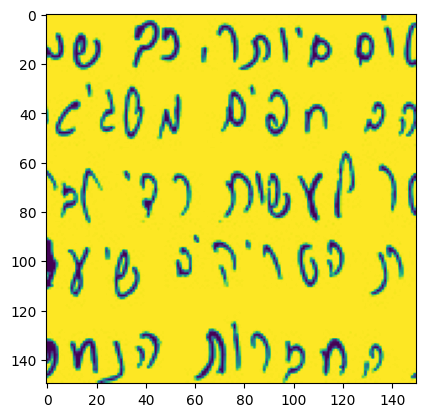


HHD_510__w510_F_1_form44__3.jpg


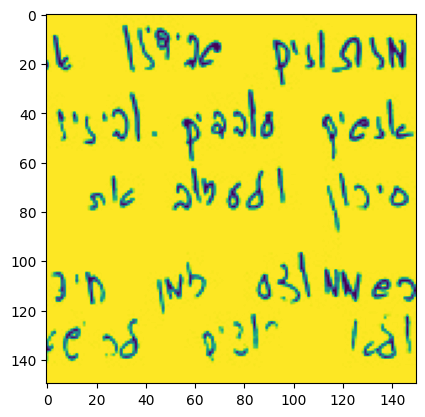


HHD_575__w575_M_3_form2__3.jpg


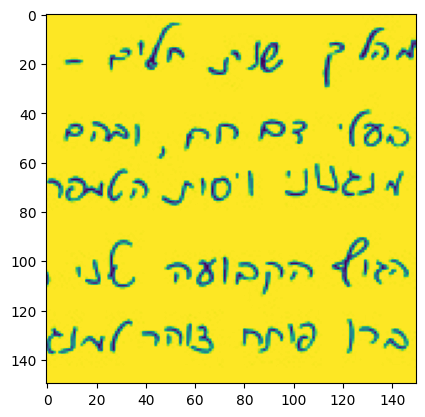


HHD_510__w510_F_1_form44__1.jpg


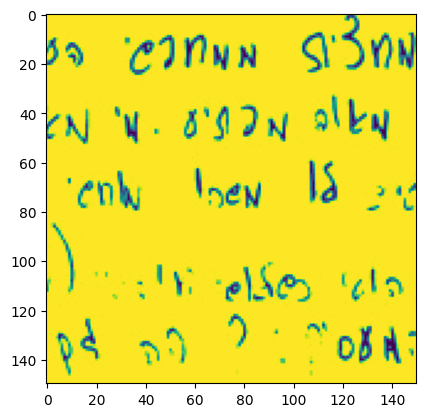

In [ ]:
print(df_p['left_fn'][0])
plt.imshow(data['lefts'][0]*255)
plt.show()
print()
print(df_p['left_fn'][len(df_p)-1])
plt.imshow(data['lefts'][len(df_p)-1]*255)
plt.show()
print()
print(df_p['right_fn'][0])
plt.imshow(data['rights'][0]*255)
plt.show()
print()
print(df_p['right_fn'][len(df_p)-1])
plt.imshow(data['rights'][len(df_p)-1]*255)
plt.show()

donc l'ordre des array left, right est le meme que celui du df

- We check if the GeneratePairs function generate new data at each execution

In [ ]:
train_df_other, train_other = GeneratePairs(base_train_df, 'HHD', all_img_folder_path) #df_patches

In [ ]:
df_p2 = train_df_other
data2 = train_other

In [ ]:
#-*-
common = df_p.apply(tuple, 1).isin(df_p2.apply(tuple, 1))
common.value_counts()/len(common)

so the functionGeneratePair create new dataset each time

In [ ]:
#index 0 are left images, index 1 are right images, index 2 are labels,


"""
Output:
(3512, 150, 150, 1)
(3512, 150, 150, 1)
(392, 150, 150, 1)
(392, 150, 150, 1)
(688, 150, 150, 1)
(688, 150, 150, 1)
"""
#train
print(train['lefts'].shape)
print(train['rights'].shape)
#val
print(val['lefts'].shape)
print(val['rights'].shape)
#test
print(test['lefts'].shape)
print(test['rights'].shape)

#### Analyzing KHATT Data

In [ ]:
"""
Brut data:
  train size: 0.7637433260826577, val size: 0.0834981214158592, test size: 0.1527585525014831
Final data:
 train size: 0.765, val size: 0.085, test size: 0.15
"""

# print(f'Brut data:\n  train size: {len(base_train_df)/len(sub_df2)}, val size: {len(base_val_df)/len(sub_df2)}, test size: {len(base_test_df)/len(sub_df2)}')

total_size = len(train_df) + len(val_df) + len(test_df)
print(f'Final data:\n train size: {len(train_df)/total_size}, val size: {len(val_df)/total_size}, test size: {len(test_df)/total_size}')


Final data:
 train size: 0.765, val size: 0.085, test size: 0.15


In [ ]:
df_p = train_df[:3512]
data = train

# df_p = val_df
# data = val

# df_p = test_df
# data = test

In [ ]:
"6120  rows"
df_p[:3512]

,labels,left_writer,right_writer,left_doc,right_doc,left_fn,right_fn
0,1,0923,0923,KHATT_Wr0923_Para4,KHATT_Wr0923_Para1,KHATT_0923__KHATT_Wr0923_Para4__0.jpg,KHATT_0923__KHATT_Wr0923_Para1__4.jpg
1,0,0923,0172,KHATT_Wr0923_Para4,KHATT_Wr0172_Para2,KHATT_0923__KHATT_Wr0923_Para4__0.jpg,KHATT_0172__KHATT_Wr0172_Para2__3.jpg
2,1,0172,0172,KHATT_Wr0172_Para2,KHATT_Wr0172_Para1,KHATT_0172__KHATT_Wr0172_Para2__3.jpg,KHATT_0172__KHATT_Wr0172_Para1__0.jpg
3,0,0172,0213,KHATT_Wr0172_Para2,KHATT_Wr0213_Para1,KHATT_0172__KHATT_Wr0172_Para2__3.jpg,KHATT_0213__KHATT_Wr0213_Para1__3.jpg
4,1,0213,0213,KHATT_Wr0213_Para1,KHATT_Wr0213_Para3,KHATT_0213__KHATT_Wr0213_Para1__3.jpg,KHATT_0213__KHATT_Wr0213_Para3__0.jpg
...,...,...,...,...,...,...,...
3507,0,0005,0165,KHATT_Wr0005_Para3,KHATT_Wr0165_Para1,KHATT_0005__KHATT_Wr0005_Para3__0.jpg,KHATT_0165__KHATT_Wr0165_Para1__1.jpg
3508,1,0165,0165,KHATT_Wr0165_Para1,KHATT_Wr0165_Para1,KHATT_0165__KHATT_Wr0165_Para1__1.jpg,KHATT_0165__KHATT_Wr0165_Para1__0.jpg
3509,0,0165,0258,KHATT_Wr0165_Para1,KHATT_Wr0258_Para2,KHATT_0165__KHATT_Wr0165_Para1__1.jpg,KHATT_0258__KHATT_Wr0258_Para2__3.jpg
3510,1,0258,0258,KHATT_Wr0258_Para2,KHATT_Wr0258_Para2,KHATT_0258__KHATT_Wr0258_Para2__3.jpg,KHATT_0258__KHATT_Wr0258_Para2__2.jpg


We check the part of identical pairs in the same pairs

In [ ]:
same = df_p[df_p['labels'] == 1]
len(same[same['left_fn'] == same['right_fn']]) / len(same)

0.02847380410022779

check if the data is balanced about:
- labels
- authors
- patches
- pairs of patches

and for test set:
- docs
- pair of docs

In [ ]:
df_p['labels'].value_counts()

labels
1    1756
0    1756
Name: count, dtype: int64

- Writers on each side

In [ ]:
print(f'min: {df_p["left_writer"].value_counts().min()}, max: {df_p["left_writer"].value_counts().max()}')

min: 4, max: 6


In [ ]:
print(f'min: {df_p["right_writer"].value_counts().min()}, max: {df_p["right_writer"].value_counts().max()}')

min: 4, max: 6


- Document on each side

In [ ]:
print(f'min: {df_p["left_doc"].value_counts().min()}, max: {df_p["left_doc"].value_counts().max()}')

min: 2, max: 6


In [ ]:
print(f'min: {df_p["right_doc"].value_counts().min()}, max: {df_p["right_doc"].value_counts().max()}')

min: 1, max: 6


- Patches on each side

In [ ]:
print(f'min: {df_p["left_fn"].value_counts().min()}, max: {df_p["left_fn"].value_counts().max()}')

min: 2, max: 2


In [ ]:
print(f'min: {df_p["right_fn"].value_counts().min()}, max: {df_p["right_fn"].value_counts().max()}')
print(f'avg: {df_p["right_fn"].value_counts().mean()}')


min: 1, max: 3
avg: 1.069753274444106


In [ ]:
df_pc = df_p["right_fn"].value_counts()
df_pc.value_counts()/df_pc.value_counts().sum()

count
1    0.932379
2    0.065489
3    0.002132
Name: count, dtype: float64

- Pairs of documents

In [ ]:
pairs_doc = df_p[["left_doc", "right_doc"]].value_counts()
print(pairs_doc)
print(f'\nmin: {pairs_doc.min()}, max: {pairs_doc.max()}')
print('\n', pairs_doc.value_counts()/pairs_doc.value_counts().sum())

left_doc            right_doc         
KHATT_Wr0441_Para1  KHATT_Wr0441_Para1    3
KHATT_Wr0274_Para1  KHATT_Wr0274_Para1    2
KHATT_Wr0426_Para4  KHATT_Wr0511_Para2    2
KHATT_Wr0572_Para2  KHATT_Wr0572_Para3    2
KHATT_Wr0814_Para3  KHATT_Wr0814_Para3    2
                                         ..
KHATT_Wr0349_Para1  KHATT_Wr0349_Para3    1
KHATT_Wr0349_Para2  KHATT_Wr0250_Para2    1
                    KHATT_Wr0349_Para3    1
KHATT_Wr0352_Para3  KHATT_Wr0352_Para2    1
KHATT_Wr1000_Para3  KHATT_Wr1000_Para1    1
Name: count, Length: 3386, dtype: int64

min: 1, max: 3

 count
1    0.963083
2    0.036621
3    0.000295
Name: count, dtype: float64


- Pair of patches

In [ ]:
pairs_patches = df_p[["left_fn", "right_fn"]].value_counts()
print(pairs_patches)
print(f'\nmin: {pairs_patches.min()}, max: {pairs_patches.max()}')
print('\n', pairs_patches.value_counts()/pairs_patches.value_counts().sum())

left_fn                                right_fn                             
KHATT_0001__KHATT_Wr0001_Para1__2.jpg  KHATT_0001__KHATT_Wr0001_Para4__2.jpg    1
KHATT_0669__KHATT_Wr0669_Para4__3.jpg  KHATT_0669__KHATT_Wr0669_Para1__0.jpg    1
KHATT_0667__KHATT_Wr0667_Para4__0.jpg  KHATT_0661__KHATT_Wr0661_Para3__3.jpg    1
                                       KHATT_0667__KHATT_Wr0667_Para2__1.jpg    1
KHATT_0668__KHATT_Wr0668_Para3__0.jpg  KHATT_0453__KHATT_Wr0453_Para1__1.jpg    1
                                                                               ..
KHATT_0339__KHATT_Wr0339_Para1__5.jpg  KHATT_0099__KHATT_Wr0099_Para2__1.jpg    1
                                       KHATT_0339__KHATT_Wr0339_Para1__6.jpg    1
KHATT_0339__KHATT_Wr0339_Para2__1.jpg  KHATT_0099__KHATT_Wr0099_Para2__0.jpg    1
                                       KHATT_0339__KHATT_Wr0339_Para1__7.jpg    1
KHATT_1000__KHATT_Wr1000_Para3__2.jpg  KHATT_1000__KHATT_Wr1000_Para1__1.jpg    1
Name: count, Length: 

We check that the train, val and test data are no writer in common

In [ ]:
a = np.unique(train_df['left_writer']) # -*-1
b = np.unique(train_df['right_writer']) # -*-2
writer_tr = np.concatenate((a, b))

a = np.unique(val_df['left_writer'])
b = np.unique(val_df['right_writer'])
writer_val = np.concatenate((a, b))

a = np.unique(test_df['left_writer'])
b = np.unique(test_df['right_writer'])
writer_test = np.concatenate((a, b))

In [ ]:
np.intersect1d(writer_tr, writer_val) #-*-3

array([], dtype=object)

In [ ]:
tr_val = np.concatenate((writer_tr, writer_val))
np.intersect1d(tr_val, writer_test)

array([], dtype=object)

data to feed to the model

In [ ]:
"""6120"""
len(data['lefts'])

In [ ]:
len(data['lefts']) == len(data['rights']) == len(data['labels'])

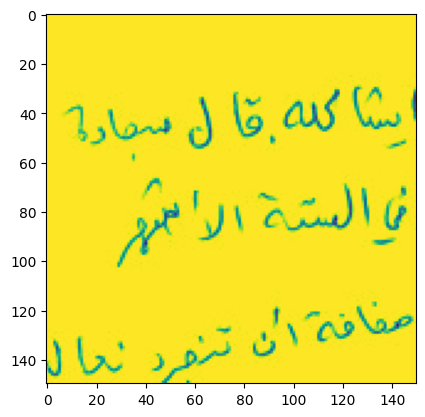

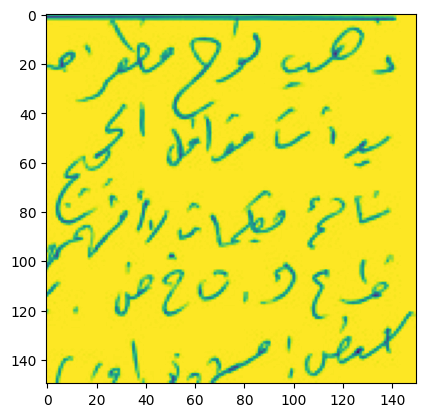

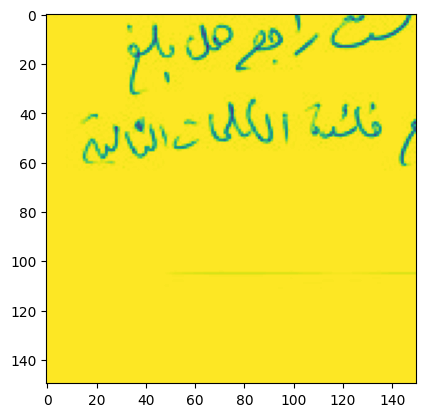

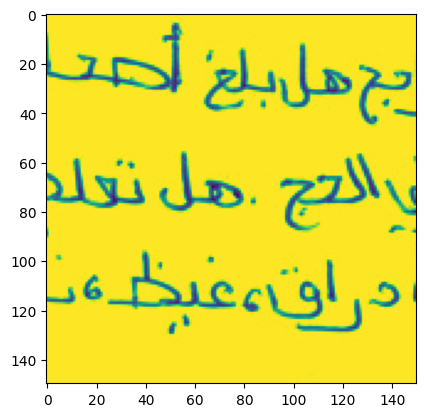

In [ ]:
plt.imshow(data['lefts'][0]*255)
plt.show()
print()
plt.imshow(data['lefts'][len(df_p)-1]*255)
plt.show()
print()
plt.imshow(data['rights'][0]*255)
plt.show()
print()
plt.imshow(data['rights'][len(df_p)-1]*255)
plt.show()

donc l'ordre des array left, right est le meme que celui du df

- We check if the GeneratePairs function generate new data at each execution


In [ ]:
train_df_other, train_other = GeneratePairs(base_train_df, 'KHATT', all_img_folder_path) #df_patches

In [ ]:
df_p2 = train_df_other
data2 = train_other

In [ ]:
#-*-
common = df_p.apply(tuple, 1).isin(df_p2.apply(tuple, 1))
common.value_counts()/len(common)

so the functionGeneratePair create new dataset each time

In [ ]:
#index 0 are left images, index 1 are right images, index 2 are labels,


"""
Output:
(6120, 150, 150, 1)
(6120, 150, 150, 1)
(680, 150, 150, 1)
(680, 150, 150, 1)
(1200, 150, 150, 1)
(1200, 150, 150, 1)
"""
#train
print(train['lefts'].shape)
print(train['rights'].shape)
#val
print(val['lefts'].shape)
print(val['rights'].shape)
#test
print(test['lefts'].shape)
print(test['rights'].shape)

In [ ]:
## Prepare

## Model HHD

### Tune Model

In [ ]:
def TuneModel(build_obj, compil_obj, train_obj, data_obj, param_tuned, model_obj=None):

    train_x, train_y = data_obj.train_x, data_obj.train_y
    val_x, val_y = data_obj.val_x, data_obj.val_y

    # create & compile model
    if model_obj == None:
        model_obj = ModelClass()
        model_obj.CreateModel(build_obj, compil_obj)

    model_obj.AddTraining(train_obj)
    # fit model
    history = model_obj.model.fit(
        train_x, train_y,
        validation_data=(val_x, val_y),
        epochs=train_obj.epochs,
        verbose=train_obj.verbose,
        batch_size=train_obj.batch_size
    )

    title = f'{param_tuned[0]}={str(param_tuned[1])}'

    # plot learning curves
    print(f'\n=== {title} ===')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='val')
    plt.title('Accuracy', pad=-50)
    plt.legend()
    plt.show()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.title('Loss', pad=-50)
    plt.legend()
    plt.show()

    model_obj.AddHistory(history)

    return model_obj

#### Learning Rate

In [ ]:
params = {
    'input_shape': input_shape,
    'epochs': 50,
    'batch_size': 32,
    # 'batch_size': 8,
    'opt': Adam,
    'model_params': None
}
p = 'lrate'
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]

for lr in learning_rates:
    if local_machine:
        gc.collect() #GPU-2

    params['lrate'] = lr
    TuneModel(train, val, params, p)

#### Weight Regularization

aurai été plus rapide avec early stopping...

In [ ]:
data_obj = hhd1_obj

build_obj = BuildParams(
    builder=BuildSiameseNN,
    input_shape=input_shape,
    alpha1=0,
    alpha2=0.0001
)

compil_obj = CompilParams(
    optimizer=Adam,
    lrate=0.00001,
    loss='categorical_crossentropy'
)

train_obj = TrainParams(
    dataset=data_obj.name,
    epochs=75,
    batch_size=32
)
p = 'alpha1'

# values = [0, 0.0001, 0.0005]
values = [0]

for v in values:
    build_obj.alpha1 = v

    param_tuned = (p, v)
    TuneModel(build_obj, compil_obj, train_obj, data_obj, param_tuned)

#### Noise Injection


=== std_dev=0.1 ===


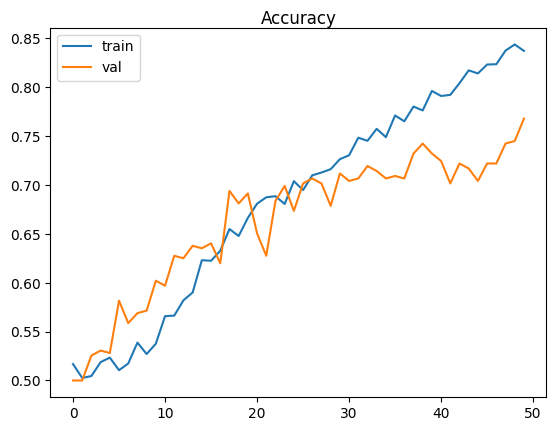

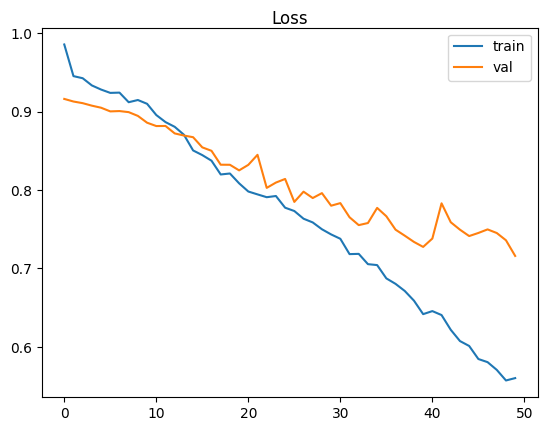

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_obj = hhd1_obj

build_obj = BuildParams(
    builder=BuildSiameseNN,
    input_shape=input_shape,
    alpha1=0,
    alpha2=0.0001,
    std_dev=0.1,
    batch_normal=True
)

compil_obj = CompilParams(
    optimizer=Adam,
    lrate=0.00001,
    loss='categorical_crossentropy'
)

train_obj = TrainParams(
    dataset=data_obj.name,
    epochs=50,
    batch_size=32
)
p = 'std_dev'

values = [0.1]

for v in values:
    # build_obj.std_dev = v

    param_tuned = (p, v)
    TuneModel(build_obj, compil_obj, train_obj, data_obj, param_tuned)

#### Batch Normalize


=== std_dev=0.1 ===


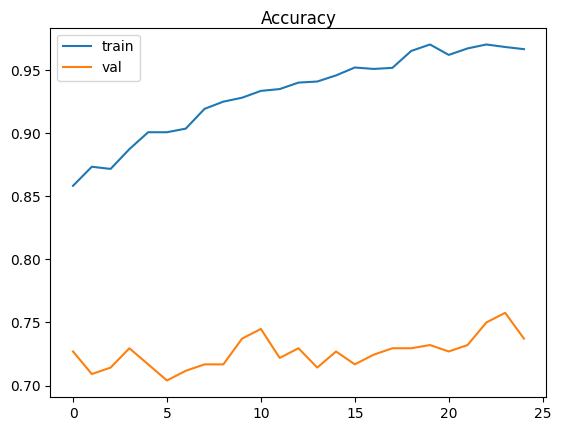

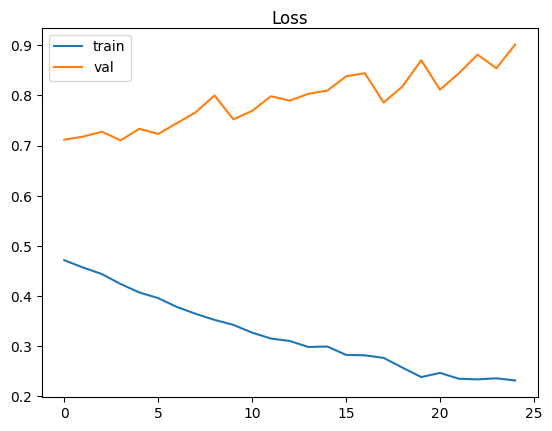

In [ ]:
data_obj = hhd1_obj #50 + (5+5+10)
# data_obj = hhd2_obj
"""
build_obj = BuildParams(
    builder=BuildSiameseNN,
    input_shape=input_shape,
    alpha1=0,
    alpha2=0.0001,
    std_dev=0.1,
    batch_normal=True
)

compil_obj = CompilParams(
    optimizer=Adam,
    lrate=0.00001,
    loss='categorical_crossentropy'
)

p = 'std_dev'

values = [0.1]
model_obj = None

## backup
# getmodel = None
getmodel = list()
getmodel.append(None) #before
getmodel.append(None) #after
"""

#--------------------------
train_obj = TrainParams(
    dataset=data_obj.name,
    epochs=25,
    batch_size=32
)

for v in values:
    # build_obj.std_dev = v

    param_tuned = (p, v)
    model_obj = TuneModel(build_obj, compil_obj, train_obj, data_obj, param_tuned, model_obj)

    if getmodel[0] == None:
        getmodel[0] = model_obj
    else:
        if getmodel[1] == None:
            getmodel[1] = model_obj
        else:
            getmodel[0], getmodel[1] = getmodel[1], model_obj


### Get Model

Create Model

In [ ]:
model = BuildSiameseNN(input_shape)

In [ ]:
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Save & Load Model

In [ ]:
# Save model

# SaveModel(model, test_acc, my_models)

In [ ]:
# Load Model

# model_name = 'model_75_20240627_000002'
# model_name = 'l2_regul_75_20240802_145437'
# model_name = 'model_78_20240629_233654'
# model_name = 'l2_regul_1p_78_20240805_163737'
model_name = 'l2_regul_1p_83_20240807_211702'

path = f'{my_models}/{model_name}.h5'

model = keras.models.load_model(path)


#### Analyze Model

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 1)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 150, 150, 1)]        0         []                            
                                                                                                  
 model (Functional)          (None, 256)                  1094864   ['input_1[0][0]',             
                                                          0          'input_2[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 512)                  0         ['model[0][0]',         

In [ ]:
import pydot
import pydotplus
import graphviz

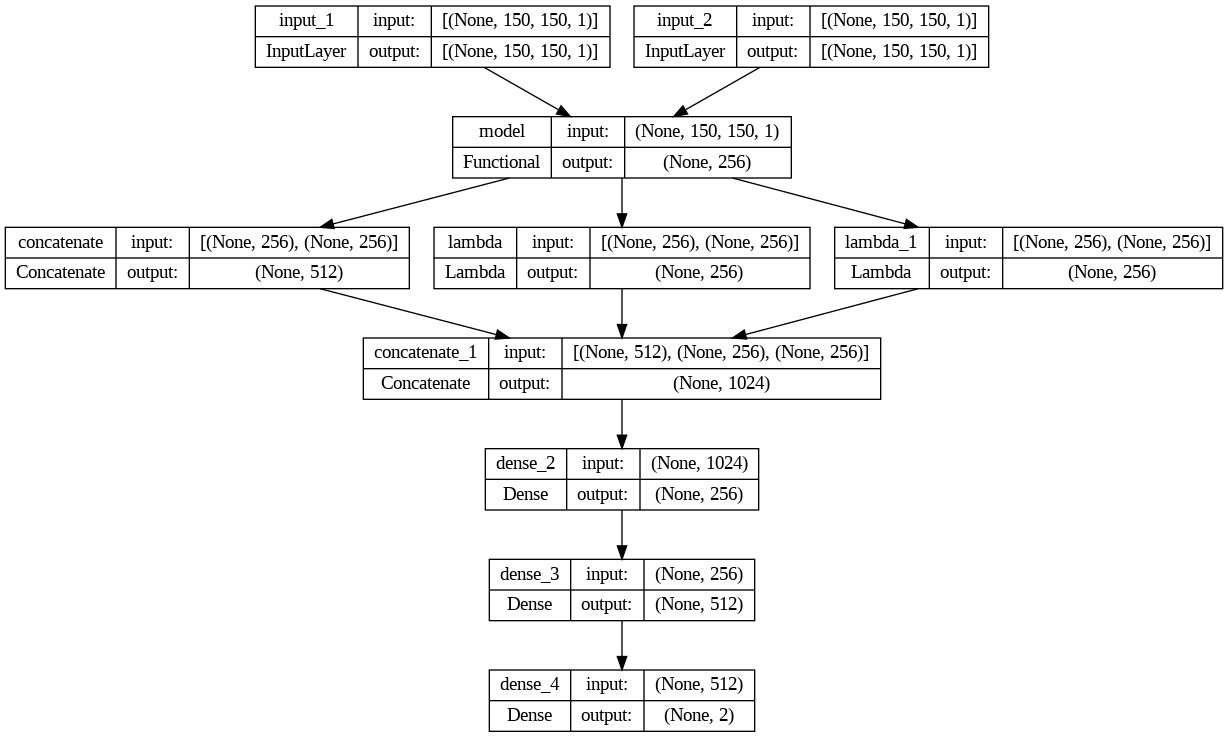

In [ ]:
tf.keras.utils.plot_model(model, "model.png", show_shapes=True)

### Train Model

In [ ]:
#A bien permis l'arret de OOM error

#GPU-1
train_x = [train['lefts'][:end_train].astype(np.float32), train['rights'][:end_train].astype(np.float32)]
train_y = to_categorical(train['labels'][:end_train].astype(np.float32))


# ????
# val_x =  [val['lefts'][:end_train].astype(np.float32), val['rights'][:end_train].astype(np.float32)]
# val_y = to_categorical(val['labels'][:end_train].astype(np.float32))
# test_x =  [test['lefts'][:end_train].astype(np.float32), test['rights'][:end_train].astype(np.float32)]
# test_y = to_categorical(test['labels'][:end_train].astype(np.float32))


In [ ]:
#??: gc.collect() #GPU-2

In [ ]:
#TRAIN 1
# #verbose=0 ??

# model.fit(
#   train_x, train_y,
#   validation_data = (val_x, val_y),
#   epochs=50,
#   batch_size=8, #GPU-3
#   # batch_size=32,
#   shuffle=shuffle
# )

In [ ]:
train_x = [train_x[1], train_x[0]]

In [ ]:
# TRAIN 2: HHD_2
#verbose=0 ??

model.fit(
  train_x, train_y,
  validation_data = (val_x, val_y),
  epochs=15,
  batch_size=8, #GPU-3
  # batch_size=32,
  shuffle=shuffle
)

### Evaluate Model

#### Evaluate model on patch level

In [ ]:
hhd1_obj = DataClass(all_data_folder_path)
hhd1_obj.LoadData('hhd_1')

In [ ]:
test_data = hhd2_obj

In [ ]:
test_x = test_data.test_x
test_y = test_data.test_y
test_df = test_data.test_df

In [ ]:
loss , acc = model.evaluate(
  test_x,
  test_y,
  verbose=0
)

print("\naccuracy: ", acc)


accuracy:  0.8095930218696594


In [ ]:
pred = model.predict(test_x)

22/22 [==============================] - 1s 20ms/step


In [ ]:
pred

array([[6.4111961e-04, 9.9935883e-01],
       [9.9805284e-01, 1.9471750e-03],
       [4.9552854e-02, 9.5044720e-01],
       ...,
       [9.9985921e-01, 1.4082387e-04],
       [5.7645756e-01, 4.2354247e-01],
       [4.5310712e-01, 5.4689288e-01]], dtype=float32)

In [ ]:
pred[:, 1]

array([9.73948777e-01, 1.37938596e-02, 8.87866199e-01, 5.23105979e-01,
       8.30044568e-01, 9.19719934e-01, 8.88935328e-01, 1.11513808e-01,
       9.97947276e-01, 9.34248924e-01, 1.10836598e-04, 8.14667046e-01,
       9.95341539e-01, 2.21391201e-01, 9.72816825e-01, 7.23988265e-02,
       9.39525425e-01, 5.38846664e-02, 9.58634853e-01, 4.45359409e-01,
       7.49013901e-01, 7.04049468e-01, 8.16961825e-01, 2.26796255e-01,
       8.56279850e-01, 8.73155653e-01, 9.65397000e-01, 1.12017989e-01,
       9.94625747e-01, 2.00977907e-01, 7.72205412e-01, 2.22261325e-01,
       8.09339702e-01, 1.92710802e-01, 9.60648358e-01, 7.67652154e-01,
       3.23712856e-01, 1.29380569e-01, 8.77766490e-01, 7.43333474e-02,
       9.91112173e-01, 1.28612787e-01, 5.57509959e-01, 5.88938832e-01,
       9.40309346e-01, 7.67161310e-01, 7.07230926e-01, 1.47293180e-01,
       6.03665590e-01, 1.15850911e-01, 1.99451536e-01, 9.58796561e-01,
       9.60512042e-01, 1.17895886e-01, 8.85886133e-01, 1.06810518e-02,
      

ROC AUC=0.874


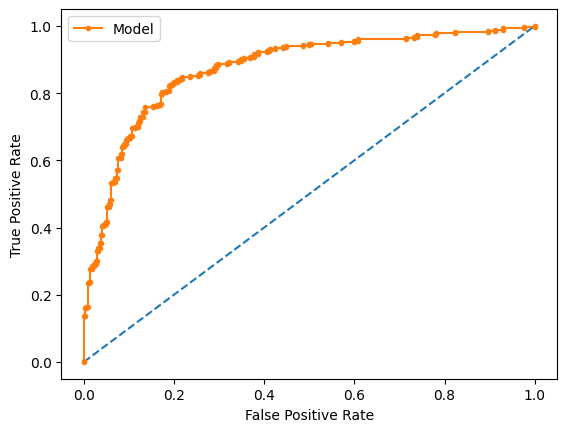

In [ ]:
EvalROC(pred, test_y)

In [ ]:
tn, fp, fn, tp = confusion_matrix(
  test_y,
  (pred >= 0.49),
  labels = [0, 1]
).ravel()

print("\n\nTrue Positive: ", tp, " False Positive:", fp)
print(" False Negative: ", fn,"True Negative: ", tn)

In [ ]:
pred_2bit, pred_1bit = TranslatePredict(pred)

In [ ]:
EvaluatePredict(pred_2bit, test_y, 2)

{'accuracy': 0.809593023255814,
 'precision': 0.7870619946091644,
 'recall': 0.8488372093023255,
 'f1': 0.8167832167832167,
 'cm': {'tp': 292, 'fp': 79, 'tn': 265, 'fn': 52}}

#### Evaluate model on document level

In [ ]:
doc_df = MakeDocDF(test_df, pred_1bit)

In [ ]:
doc_df

,left_doc,right_doc,label,pred
0,w9_F_3_form17,w9_F_3_form17,1,1
1,w100_F_1_form37,w100_F_1_form37,1,1
2,w100_F_1_form37,w554_M_2_form5,0,0
3,w105_M_1_form43,w105_M_1_form43,1,1
4,w56_F_2_form8,w56_F_2_form8,1,1
...,...,...,...,...
167,w116_M_1_form8,w279_M_2_form25,0,0
168,w124_F_1_form30,w124_F_1_form30,1,1
169,w124_F_1_form30,w143_M_1_form48,0,0
170,w132_M_1_form9,w132_M_1_form9,1,1


In [ ]:
#checking acc on samples from same writer in DIFFERENT writers
all = doc_df.loc[(doc_df['label']==1) & (doc_df['left_doc']!=doc_df['right_doc'])]
all

,left_doc,right_doc,label,pred


In [ ]:
len(all[all['pred']==1])/len(all)

ZeroDivisionError: division by zero

In [ ]:
EvaluatePredict(doc_df['pred'], doc_df['label'], 1)

{'accuracy': 0.8546511627906976,
 'precision': 0.8674698795180723,
 'recall': 0.8372093023255814,
 'f1': 0.8520710059171598,
 'cm': {'tp': 72, 'fp': 11, 'tn': 75, 'fn': 14}}

In [ ]:
pred_doc = doc_df['pred'].values.astype(int)
pred_doc_true = doc_df['label'].values.astype(int)

ROC AUC=0.855


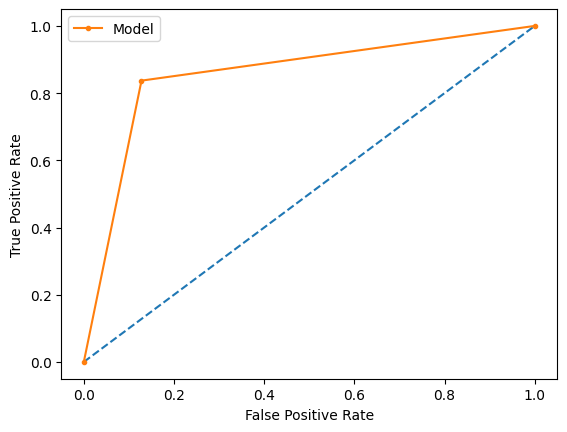

In [ ]:
EvalROC(pred_doc, pred_doc_true, False)

## Experiments

### Building Model Tests

In [ ]:
#Compil Tests

#architecture RN

compil_params = {
    'opt': Adam,
    'lr':0.001,
}

#fit_model

### Training Model Tests

#### Create Experiment Table

In [ ]:
cols = [
    'model after training',
    'model before training',
    'dataset',
    'train parameters',
    'train accuracy',
    'val accuracy',
    'test accuracy',
    'test precision',
    'test recall',
    'test f1-score'
]
xp_df = pd.DataFrame(columns=cols)
xp_df

,model after training,model before training,dataset,train parameters,train accuracy,val accuracy,test accuracy,test precision,test recall,test f1-score


In [ ]:
"""
xp_dict = {
    'model after training': 'model_75_20240627_000002',
    'model before training': 'None',
    'dataset': 'hhd_1',
    'train parameters': {'batch_size': 32, 'epochs': 50, 'shuffle': True, 'verbose': 0},
    'train accuracy': 0.91,
    'val accuracy': 0.76,
    'test accuracy': 0.7558139534883721,
    'test precision':  0.7315789473684211,
    'test recall': 0.8081395348837209,
    'test f1-score': 0.7679558011049724
}

xp_dict = {
    'model after training': 'model_78_20240629_233654',
    'model before training': 'model_75_20240627_000002',
    'dataset': 'hhd_2',
    'train parameters': {'batch_size': 8, 'epochs': 15, 'shuffle': True, 'verbose': 0},
    'train accuracy': 0.96,
    'val accuracy': 0.74,
    'test accuracy': 0.7892441860465116,
    'test precision':  0.762532981530343,
    'test recall': 0.8401162790697675,
    'test f1-score': 0.7994467496542186
}

xp_df = RecordTest(xp_df, xp_dict)
"""

In [ ]:
xp_df

,model after training,model before training,dataset,train parameters,train accuracy,val accuracy,test accuracy,test precision,test recall,test f1-score
0,model_75_20240627_000002,None,hhd_1,"{'batch_size': 32, 'epochs': 50, 'shuffle': Tr...",0.91,0.76,0.755814,0.731579,0.80814,0.767956
1,model_78_20240629_233654,model_75_20240627_000002,hhd_2,"{'batch_size': 8, 'epochs': 15, 'shuffle': Tru...",0.96,0.74,0.789244,0.762533,0.840116,0.799447


#### Create Evaluation Table

In [ ]:
cols = ['model',
        'dataset',
        'confusion matrix',
        'test accuracy',
        'test precision',
        'test recall',
        'test f1-score']
eval_df = pd.DataFrame(columns= cols)

In [ ]:
eval_df

,model,dataset,confusion matrix,test accuracy,test precision,test recall,test f1-score


#### Load & Save Table

In [ ]:
xp_path = f'{all_data_folder_path}/experiments.pkl'
eval_path = f'{all_data_folder_path}/eval.pkl'
xp_path_p = f'{root_private}/experiments.pkl'
eval_path_p = f'{root_private}/eval.pkl'

In [ ]:
#Save experiment table

#xp_df.to_pickle(xp_path_p)
# eval_df.to_pickle(eval_path_p)

In [ ]:
# Load experiment table

xp_df = pd.read_pickle(xp_path_p)
eval_df = pd.read_pickle(eval_path_p)
# xp_df = pd.read_pickle(xp_path)
# eval_df = pd.read_pickle(eval_path)

In [ ]:
xp_df[9:]

,model after training,model before training,dataset,train parameters,train accuracy,val accuracy,test accuracy,test precision,test recall,test f1-score
9,noise_regul_1p_72_20240817_213648,None,hhd_1,"{'epochs': 60, 'batch_size': 32, 'verbose': 0,...",0.694191,0.655612,0.72093,0.657025,0.924419,0.768116
10,noise_regul_1p_73_20240817_214248,noise_regul_1p_72_20240817_213648,hhd_1,"{'epochs': 10, 'batch_size': 32, 'verbose': 0,...",0.753891,0.740646,0.734012,0.691211,0.84593,0.760784
11,noise_regul_1p_74_20240817_215143,noise_regul_1p_73_20240817_214248,hhd_1,"{'epochs': 10, 'batch_size': 32, 'verbose': 0,...",0.795748,0.733844,0.748547,0.712159,0.834302,0.768407
12,noise_regul_1p_75_20240817_220129,noise_regul_1p_74_20240817_215143,hhd_1,"{'epochs': 10, 'batch_size': 32, 'verbose': 0,...",0.823747,0.738946,0.752907,0.720812,0.825581,0.769648
13,noise_regul_1p_79_20240817_220825,noise_regul_1p_75_20240817_220129,hhd_2,"{'epochs': 15, 'batch_size': 32, 'verbose': 0,...",0.804385,0.77551,0.793605,0.746341,0.889535,0.811671
14,noise_regul_1p_79_20240817_222107,noise_regul_1p_79_20240817_220825,hhd_2,"{'epochs': 10, 'batch_size': 32, 'verbose': 0,...",0.838933,0.787415,0.799419,0.761421,0.872093,0.813008


In [ ]:
eval_df

#### Experiments

##### Save/load model

In [ ]:
#Secu avant training

#si save:SaveModelObject(model_obj, savemodel=True)
# si load:model_obj = LoadModelObject('l2_regul_1p_79_20240805_180018')

#-----End

# Send save: SaveModelObject(model_obj, path=my_models, savemodel=False)
#end load:
model_obj = LoadModelObject('noise_regul_1p_79_20240817_222107', path=my_models)


In [ ]:
model_name = 'noise_regul_1p_79_20240817_222107'
model_path = f'{my_models}/{model_name}'
model = keras.models.load_model(f'{model_path}.h5')
model_obj = ModelClass()
model_obj.model = model
model_obj.name = model_name

##### data

In [ ]:
hhd1_obj = DataClass(all_data_folder_path)
hhd1_obj.LoadData('hhd_1')

In [ ]:
hddOneP_obj= DataClass(all_data_folder_path)
hddOneP_obj.LoadData('hhd_oneplus')

In [ ]:
hhd2_obj= DataClass(all_data_folder_path)
hhd2_obj.LoadData('hhd_2')

In [ ]:
hhd3_obj= DataClass(all_data_folder_path)
hhd3_obj.GetData(train, val, test, dfs=(train_df, val_df, test_df))
hhd3_obj.name = 'hhd_3'

##### experiment

In [ ]:
model_obj.last_epochs = 10
model_obj.PlotLearningCurve()


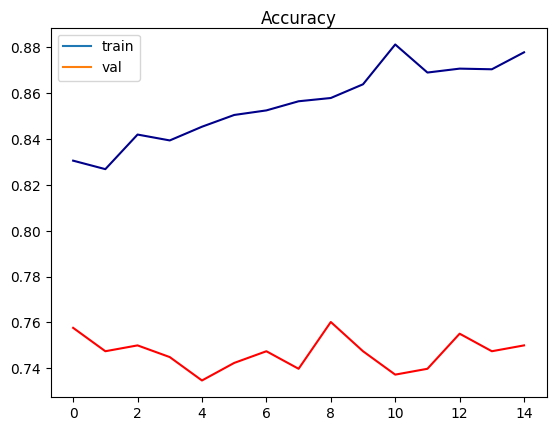

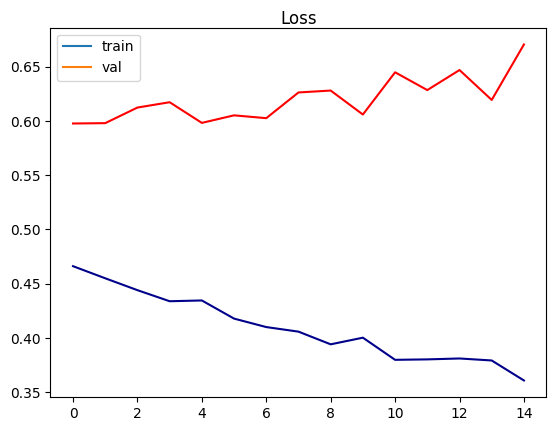

22/22 [==============================] - 1s 49ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
data_obj = hhd1_obj
# data_obj = hhd2_obj
# data_obj = hhd3_obj


"""
build_obj = BuildParams(
    builder=BuildSiameseNN,
    input_shape=input_shape,
    alpha1=0,
    alpha2=0.0001,
    std_dev=0.1,
)

compil_obj = CompilParams(
    optimizer=Adam,
    lrate=0.00001,
    loss='categorical_crossentropy'
)

model_obj = ModelClass()

# opt 1:
model_obj.CreateModel(build_obj, compil_obj)
# opt 2:model_obj.LoadModel(all_models, model_78_20240629_233654)
"""


train_obj = TrainParams(
    dataset=data_obj.name,
    epochs=15,
    batch_size=32
)
model_obj.AddTraining(train_obj)
newmodel_name = 'noise_regul'

xp_df = MakeExperiment(model_obj, data_obj, xp_df, root_private, newmodel_name=newmodel_name)

##### history

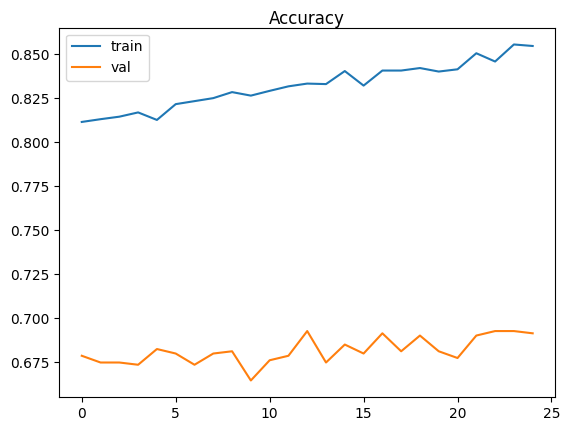

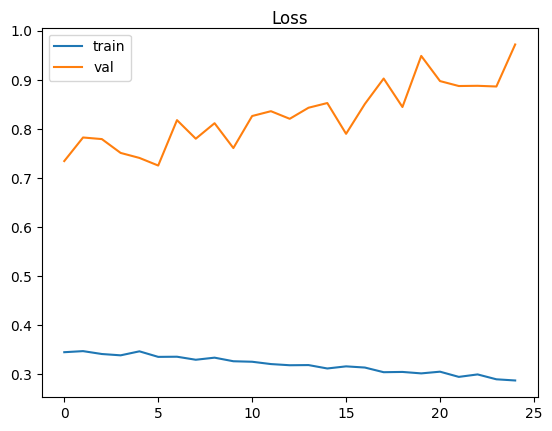

43/43 [==============================] - 1s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
onmodel = 'model_71_20240718_212938'
model_path = f'{all_models}/{onmodel}'

train = (train_x, train_y)
val = (val_x, val_y)
test = (test_x, test_y)

dataset = 'hhd1-khatt_1'
train_params = {
    # 'batch_size': 8,
    'batch_size': 32,
    'epochs': 25,
    'shuffle': True,
    'verbose': 0
}
xp_df, model = MakeExperiment(
    model_path,
    dataset,
    train, val, test,
    xp_df,
    train_params,
    my_models,
    model=model, local=False)

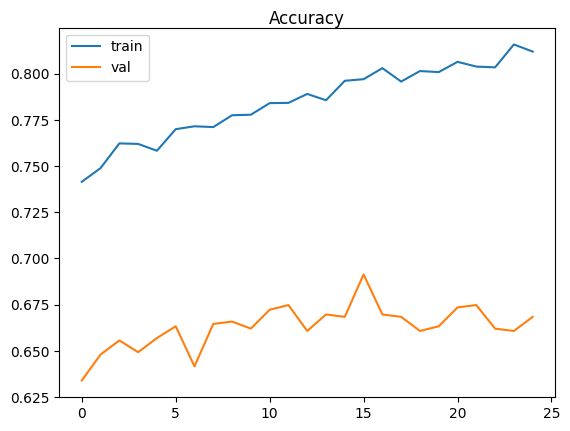

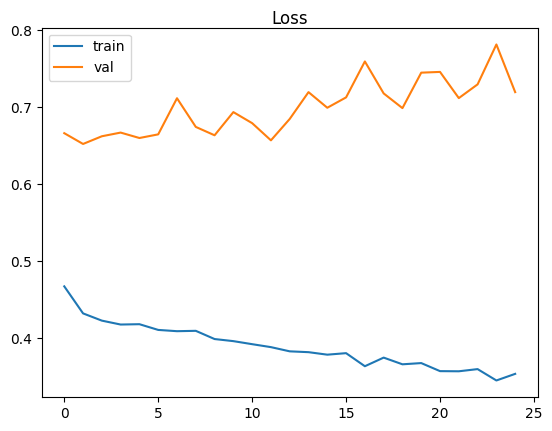

43/43 [==============================] - 1s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
onmodel = 'model_75_20240627_000002'
model_path = f'{all_models}/{onmodel}'
train = (train_x, train_y)
val = (val_x, val_y)
test = (test_x, test_y)
dataset = 'hhd1-khatt_1'
train_params = {
    # 'batch_size': 8,
    'batch_size': 32,
    'epochs': 25,
    'shuffle': True,
    'verbose': 0
}
xp_df, model = MakeExperiment(
    model_path,
    dataset,
    train, val, test,
    xp_df,
    train_params,
    my_models,
    model=None, local=False)

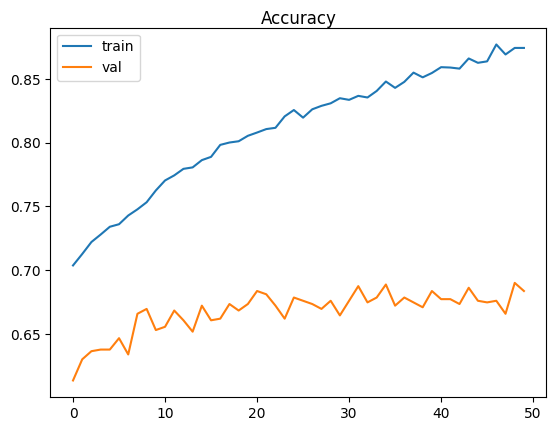

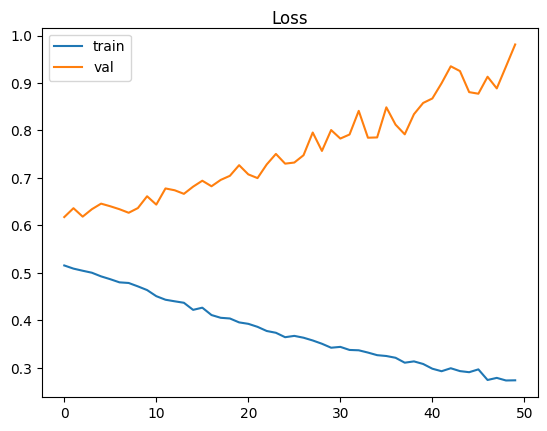

43/43 [==============================] - 1s 16ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
onmodel = 'model_64_20240718_171523'
model_path = f'{all_models}/{onmodel}'
train = (train_x, train_y)
val = (val_x, val_y)
test = (test_x, test_y)
dataset = 'hhd1-khatt_1'
train_params = {
    # 'batch_size': 8,
    'batch_size': 32,
    'epochs': 50,
    'shuffle': True,
    'verbose': 0
}
xp_df, model = MakeExperiment(model_path, dataset, train, val, test, xp_df, train_params, my_models, model=model, local=False)

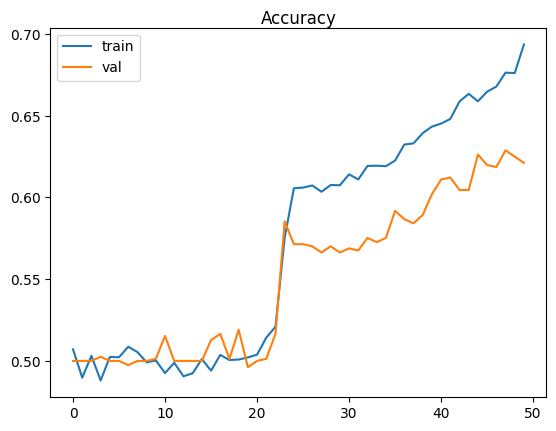

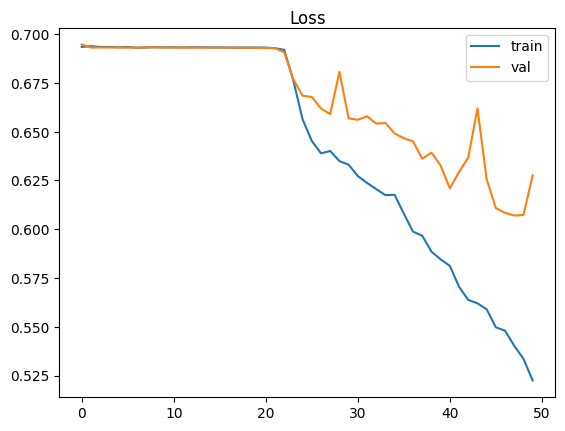

43/43 [==============================] - 1s 17ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# onmodel =
model_path = None
train = (train_x, train_y)
val = (val_x, val_y)
test = (test_x, test_y)
dataset = 'hhd1-khatt_1'
train_params = {
    # 'batch_size': 8,
    'batch_size': 32,
    'epochs': 50,
    'shuffle': True,
    'verbose': 0
}
xp_df, model = MakeExperiment(model_path, dataset, train, val, test, xp_df, train_params, my_models, model=model, local=False)

In [ ]:
onmodel = 'model_75_20240627_000002'
model_path = f'{all_models}/{onmodel}'
train = (train_x, train_y)
val = (val_x, val_y)
test = (test_x, test_y)
dataset = 'khatt_1'
train_params = {
    'batch_size': 8,
    # 'batch_size': 32,
    'epochs': 25,
    'shuffle': True,
    'verbose': 0
}
xp_df, _ = MakeExperiment(model_path, dataset, train, val, test, xp_df, train_params, my_models)

#### Evaluation

In [ ]:
xp_df

,model after training,model before training,dataset,train parameters,train accuracy,val accuracy,test accuracy,test precision,test recall,test f1-score
0,model_75_20240627_000002,None,hhd_1,"{'batch_size': 32, 'epochs': 50, 'shuffle': Tr...",0.91,0.76,0.755814,0.731579,0.80814,0.767956
1,model_78_20240629_233654,model_75_20240627_000002,hhd_2,"{'batch_size': 8, 'epochs': 15, 'shuffle': Tru...",0.96,0.74,0.789244,0.762533,0.840116,0.799447
2,model_74_20240714_125223,model_75_20240627_000002,khatt_1,"{'batch_size': 8, 'epochs': 25, 'shuffle': Tru...",0.854793,0.696078,0.7425,0.68348,0.903333,0.778177
3,model_64_20240718_171523,None,hhd1-khatt_1,"{'batch_size': 32, 'epochs': 50, 'shuffle': Tr...",0.682043,0.625,0.646802,0.603272,0.857558,0.708283
4,model_72_20240718_174148,model_64_20240718_171523,hhd1-khatt_1,"{'batch_size': 32, 'epochs': 50, 'shuffle': Tr...",0.87258,0.679847,0.726744,0.691176,0.819767,0.75
5,model_71_20240718_212938,model_75_20240627_000002,hhd1-khatt_1,"{'batch_size': 32, 'epochs': 25, 'shuffle': Tr...",0.810364,0.66369,0.711483,0.666667,0.84593,0.745676
6,model_72_20240718_230305,model_71_20240718_212938,hhd1-khatt_1,"{'batch_size': 32, 'epochs': 25, 'shuffle': Tr...",0.851841,0.692177,0.729651,0.677928,0.875,0.763959
7,model_73_20240731_145445,None,hhd_oneplus,"{'batch_size': 32, 'epochs': 50, 'shuffle': Tr...",0.837324,0.692641,0.732477,0.679928,0.878505,0.766565
8,l2_regul_1p_79_20240805_180018,l2_regul_1p_78_20240805_163737,hhd_2,"{'epochs': 10, 'batch_size': 32, 'verbose': 0,...",0.846147,0.778912,0.799419,0.75122,0.895349,0.816976
9,noise_regul_1p_72_20240817_213648,None,hhd_1,"{'epochs': 60, 'batch_size': 32, 'verbose': 0,...",0.694191,0.655612,0.72093,0.657025,0.924419,0.768116


In [ ]:
eval_df

,model,dataset,confusion matrix,test accuracy,test precision,test recall,test f1-score
0,model_75_20240627_000002,hhd_1,"{'tp': 278, 'fp': 102, 'tn': 242, 'fn': 66}",0.755814,0.731579,0.80814,0.767956
1,model_75_20240627_000002,hhd_2,"{'tp': 291, 'fp': 102, 'tn': 242, 'fn': 53}",0.774709,0.740458,0.84593,0.789688
2,model_75_20240627_000002,khatt_1,"{'tp': 600, 'fp': 600, 'tn': 0, 'fn': 0}",0.5,0.5,1.0,0.666667
3,model_78_20240629_233654,hhd_1,"{'tp': 285, 'fp': 97, 'tn': 247, 'fn': 59}",0.773256,0.746073,0.828488,0.785124
4,model_78_20240629_233654,hhd_2,"{'tp': 289, 'fp': 90, 'tn': 254, 'fn': 55}",0.789244,0.762533,0.840116,0.799447
5,model_78_20240629_233654,khatt_1,"{'tp': 600, 'fp': 600, 'tn': 0, 'fn': 0}",0.5,0.5,1.0,0.666667
6,model_74_20240714_125223,hhd_1,"{'tp': 341, 'fp': 340, 'tn': 4, 'fn': 3}",0.501453,0.500734,0.991279,0.665366
7,model_74_20240714_125223,hhd_2,"{'tp': 343, 'fp': 339, 'tn': 5, 'fn': 1}",0.505814,0.502933,0.997093,0.668616
8,model_74_20240714_125223,khatt_1,"{'tp': 542, 'fp': 251, 'tn': 349, 'fn': 58}",0.7425,0.68348,0.903333,0.778177
9,model_72_20240718_174148,hhd_1,"{'tp': 289, 'fp': 118, 'tn': 226, 'fn': 55}",0.748547,0.710074,0.840116,0.76964


In [ ]:
datasets = [
    all_data_folder_path + '/hhd/hhd_1',
    all_data_folder_path + '/hhd/hhd_2',
    all_data_folder_path + '/hhd/hhd_oneplus',
    all_data_folder_path + '/khatt/khatt_1'
]
models = [
    # 'model_75_20240627_000002',
    # 'model_78_20240629_233654',
    # 'model_74_20240714_125223',
    # 'model_72_20240718_174148',
    # 'model_71_20240718_212938',
    # 'model_72_20240718_230305',
    # 'model_73_20240731_145445'
    # 'l2_regul_74_20240805_152636',
    # 'l2_regul_74_20240805_154734',
    # 'l2_regul_1p_75_20240805_162331',
    # 'l2_regul_1p_78_20240805_163737',
    # 'l2_regul_1p_79_20240805_180018'

    # 'l2_regul_1p_83_20240807_211702'
    'noise_regul_1p_79_20240817_222107'
]

for m in models:
    model_name = m
    # model_path = f'{all_models}/{m}'
    model_path = f'{my_models}/{m}'
    model_test = keras.models.load_model(f'{model_path}.h5')
    eval_df = EvalExperiment(model_test, model_name, datasets, eval_df)

eval_df.to_pickle(f'{root_private}/eval.pkl')

38/38 [==============================] - 1s 19ms/step


In [ ]:
eval_df.sort_values(by=['model'])

,model,dataset,confusion matrix,test accuracy,test precision,test recall,test f1-score
39,l2_regul_1p_75_20240805_162331,khatt_1,"{'tp': 600, 'fp': 600, 'tn': 0, 'fn': 0}",0.5,0.5,1.0,0.666667
38,l2_regul_1p_75_20240805_162331,hhd_oneplus,"{'tp': 353, 'fp': 171, 'tn': 257, 'fn': 75}",0.712617,0.673664,0.824766,0.741597
37,l2_regul_1p_75_20240805_162331,hhd_2,"{'tp': 305, 'fp': 120, 'tn': 224, 'fn': 39}",0.768895,0.717647,0.886628,0.793238
36,l2_regul_1p_75_20240805_162331,hhd_1,"{'tp': 293, 'fp': 120, 'tn': 224, 'fn': 51}",0.751453,0.709443,0.851744,0.774108
43,l2_regul_1p_78_20240805_163737,khatt_1,"{'tp': 600, 'fp': 600, 'tn': 0, 'fn': 0}",0.5,0.5,1.0,0.666667
42,l2_regul_1p_78_20240805_163737,hhd_oneplus,"{'tp': 357, 'fp': 138, 'tn': 290, 'fn': 71}",0.755841,0.721212,0.834112,0.773564
41,l2_regul_1p_78_20240805_163737,hhd_2,"{'tp': 304, 'fp': 107, 'tn': 237, 'fn': 40}",0.786337,0.739659,0.883721,0.805298
40,l2_regul_1p_78_20240805_163737,hhd_1,"{'tp': 288, 'fp': 106, 'tn': 238, 'fn': 56}",0.764535,0.730964,0.837209,0.780488
47,l2_regul_1p_79_20240805_180018,khatt_1,"{'tp': 600, 'fp': 600, 'tn': 0, 'fn': 0}",0.5,0.5,1.0,0.666667
44,l2_regul_1p_79_20240805_180018,hhd_1,"{'tp': 298, 'fp': 104, 'tn': 240, 'fn': 46}",0.781977,0.741294,0.866279,0.798928


In [ ]:
models_check = [
    # 'model_75_20240627_000002',
    # 'model_78_20240629_233654',
    # 'model_74_20240714_125223',
    # 'model_72_20240718_174148',
    # 'model_71_20240718_212938',
    # 'model_72_20240718_230305',
    # 'model_73_20240731_145445'
    # 'l2_regul_74_20240805_152636',
    # 'l2_regul_74_20240805_154734',
    # 'l2_regul_1p_75_20240805_162331',
    # 'l2_regul_1p_78_20240805_163737',
    # 'l2_regul_1p_79_20240805_180018',

    'l2_regul_1p_83_20240807_211702',
    # 'noise_regul_1p_79_20240817_222107'
]
sort1 = ['dataset','test accuracy', 'test precision',	'test recall',	'test f1-score']
eval_df.sort_values(by=sort1).loc[eval_df['model'].isin(models_check)]

,model,dataset,confusion matrix,test accuracy,test precision,test recall,test f1-score
48,l2_regul_1p_83_20240807_211702,hhd_1,"{'tp': 292, 'fp': 79, 'tn': 265, 'fn': 52}",0.809593,0.787062,0.848837,0.816783
49,l2_regul_1p_83_20240807_211702,hhd_1_doc,"{'tp': 72, 'fp': 11, 'tn': 75, 'fn': 14}",0.854651,0.86747,0.837209,0.852071
50,l2_regul_1p_83_20240807_211702,hhd_2,"{'tp': 300, 'fp': 78, 'tn': 266, 'fn': 44}",0.822674,0.793651,0.872093,0.831025
51,l2_regul_1p_83_20240807_211702,hhd_2_doc,"{'tp': 72, 'fp': 11, 'tn': 75, 'fn': 14}",0.854651,0.86747,0.837209,0.852071
52,l2_regul_1p_83_20240807_211702,hhd_oneplus,"{'tp': 346, 'fp': 118, 'tn': 310, 'fn': 82}",0.766355,0.74569,0.808411,0.775785
53,l2_regul_1p_83_20240807_211702,hhd_oneplus_doc,"{'tp': 82, 'fp': 19, 'tn': 88, 'fn': 25}",0.794393,0.811881,0.766355,0.788462
54,l2_regul_1p_83_20240807_211702,khatt_1,"{'tp': 600, 'fp': 600, 'tn': 0, 'fn': 0}",0.5,0.5,1.0,0.666667
55,l2_regul_1p_83_20240807_211702,khatt_1_doc,"{'tp': 150, 'fp': 150, 'tn': 0, 'fn': 0}",0.5,0.5,1.0,0.666667


In [ ]:
eval_df[eval_df['dataset']=='hhd_oneplus']

,model,dataset,confusion matrix,test accuracy,test precision,test recall,test f1-score
21,model_75_20240627_000002,hhd_oneplus,"{'tp': 349, 'fp': 147, 'tn': 281, 'fn': 79}",0.735981,0.703629,0.815421,0.755411
22,model_73_20240731_145445,hhd_oneplus,"{'tp': 376, 'fp': 177, 'tn': 251, 'fn': 52}",0.732477,0.679928,0.878505,0.766565
23,model_78_20240629_233654,hhd_oneplus,"{'tp': 346, 'fp': 147, 'tn': 281, 'fn': 82}",0.732477,0.701826,0.808411,0.751357
24,model_72_20240718_174148,hhd_oneplus,"{'tp': 345, 'fp': 168, 'tn': 260, 'fn': 83}",0.706776,0.672515,0.806075,0.733262
25,model_71_20240718_212938,hhd_oneplus,"{'tp': 338, 'fp': 151, 'tn': 277, 'fn': 90}",0.718458,0.691207,0.78972,0.737186
26,model_72_20240718_230305,hhd_oneplus,"{'tp': 345, 'fp': 145, 'tn': 283, 'fn': 83}",0.733645,0.704082,0.806075,0.751634
27,model_78_20240629_233654,hhd_oneplus,"{'tp': 346, 'fp': 147, 'tn': 281, 'fn': 82}",0.732477,0.701826,0.808411,0.751357
